In [2]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
from scipy.io import wavfile
import scipy

%matplotlib inline



# Лабороторная работа #2 (Цифровой спектральный анализ детерминированных сигналов)

In [3]:
def plot_signal(signal, title="signal"):
    k = np.linspace(0, len(signal), len(signal))

    plt.stem(k, signal)
    plt.title(title)
    plt.xlabel("$k$")
    plt.ylabel(title)
    plt.show()

# Задание 1

## 1.1

Signal stats:
	Sample rate: 44100
	Duration: 0.37151927437641724



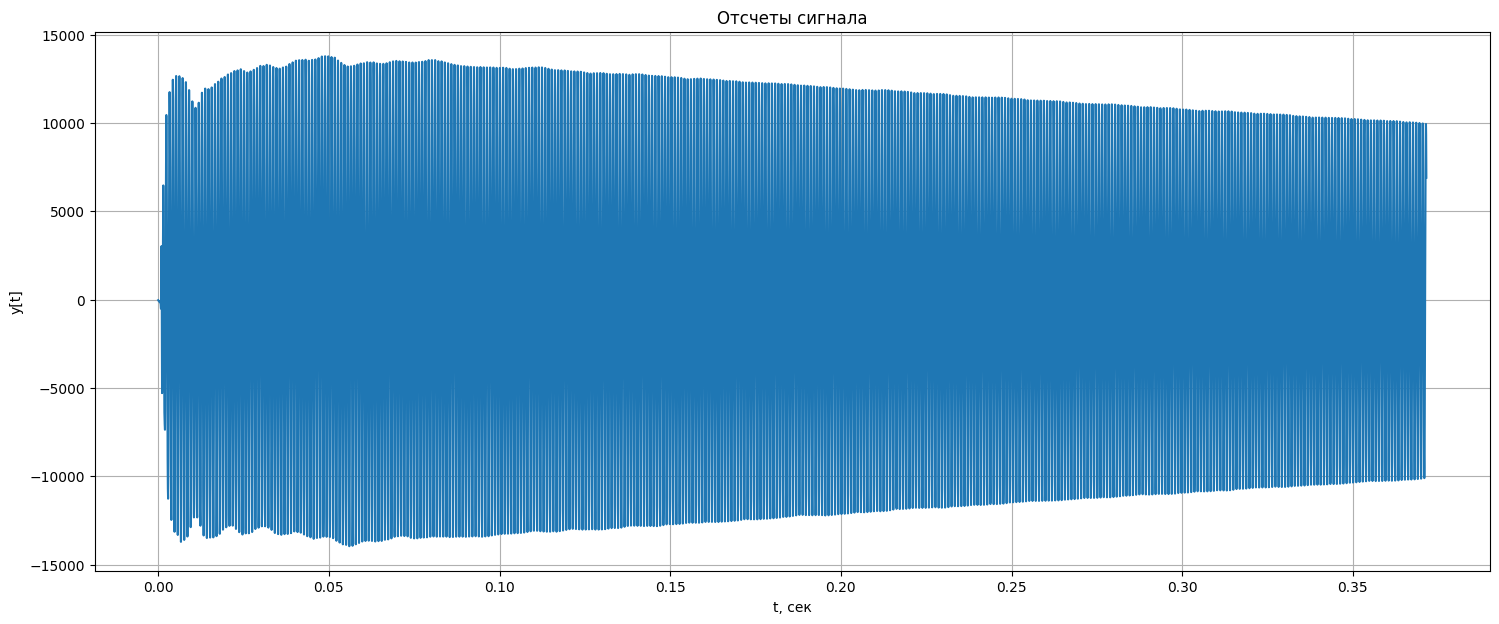

In [4]:
samplerate, wav_data = wavfile.read("data/vibraphone1.wav")

n = 2**14
y_k = np.array(wav_data[:n])
duration = n / samplerate
t_k = np.linspace(0, duration, n)

print(f"Signal stats:\n\tSample rate: {samplerate}\n\tDuration: {duration}\n")

plt.figure(figsize=[18,7])
plt.grid()
plt.title('Отсчеты сигнала')
plt.xlabel('t, сек')
plt.ylabel('y[t]')

plt.plot(t_k, y_k)

#### Общий график ДВПФ

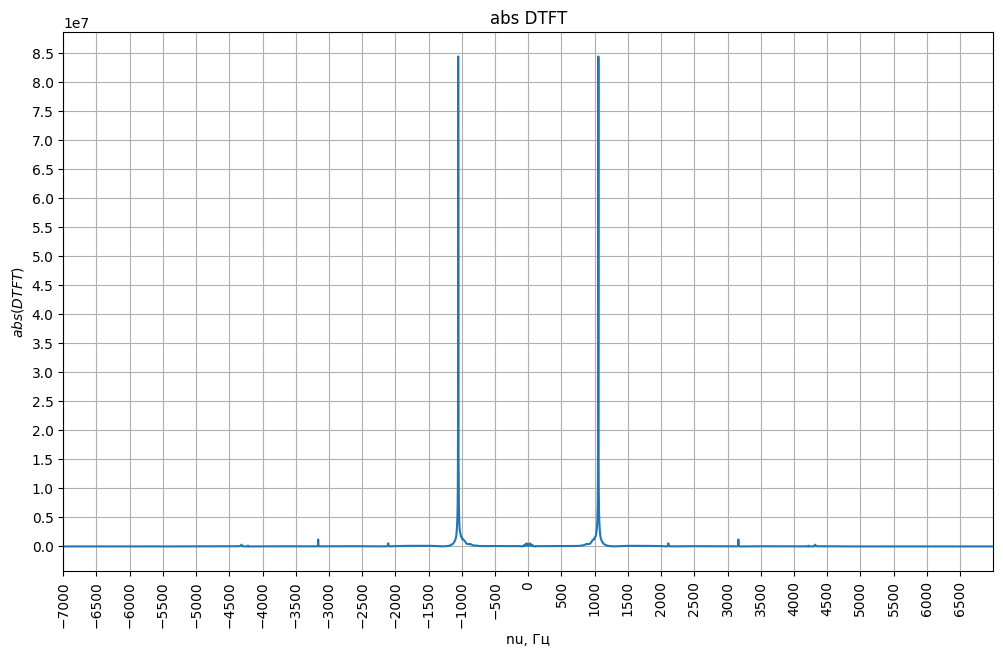

In [5]:
dtft_y_k = np.fft.fftshift(np.fft.fft(y_k, n))
nu = (np.arange(n) / (n) - 0.5) * samplerate

plt.figure(figsize=[12,7])

plt.xlim(-7000, 7000)
plt.xticks(np.arange(-7000, 7000, 500), rotation=90)
plt.yticks(np.arange(0, 9 * 1e7, 0.5 * 1e7))

plt.grid()
plt.title('abs DTFT')
plt.xlabel('nu, Гц')
plt.ylabel('$abs(DTFT)$')

plt.plot(nu, np.abs(dtft_y_k))

### Графики вблизи основных гармоник


f1 = 1055.375 Hz


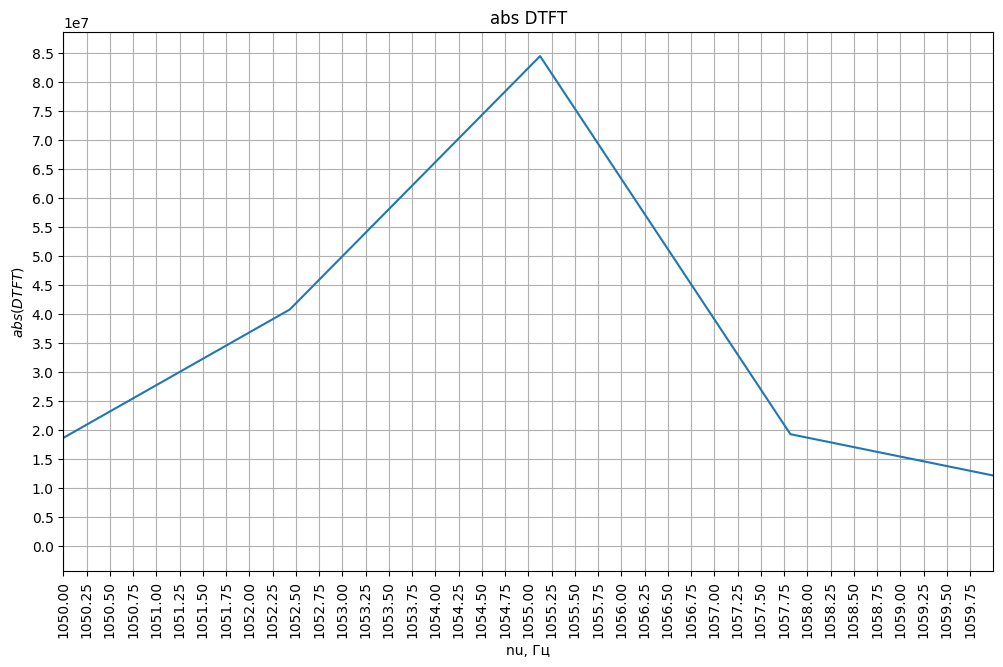

In [6]:
plt.figure(figsize=[12,7])

plt.xlim(1050, 1060)
plt.xticks(np.arange(1050, 1060, 0.25), rotation=90)
plt.yticks(np.arange(0, 9 * 1e7, 0.5 * 1e7))

plt.grid()
plt.title('abs DTFT')
plt.xlabel('nu, Гц')
plt.ylabel('$abs(DTFT)$')

plt.plot(nu, np.abs(dtft_y_k))


f2 = 3162.6 Hz

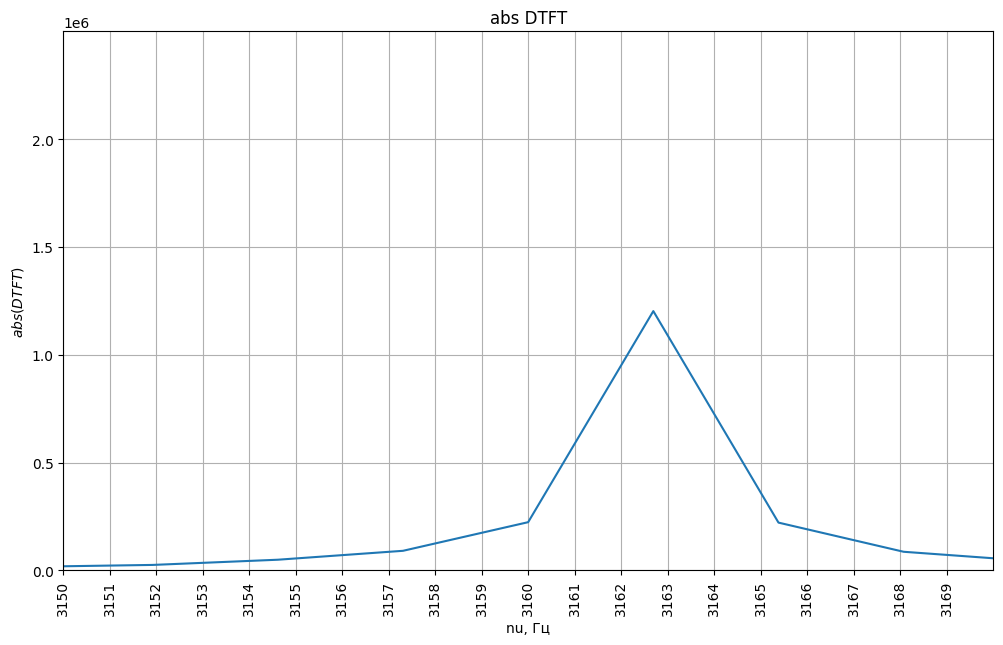

In [7]:
plt.figure(figsize=[12,7])

plt.xlim(3150, 3170)
plt.ylim(0, 0.25 * 1e7)

plt.xticks(np.arange(3150, 3170, 1), rotation=90)
plt.yticks(np.arange(0, 0.25 * 1e7, 0.05 * 1e7))

plt.grid()
plt.title('abs DTFT')
plt.xlabel('nu, Гц')
plt.ylabel('$abs(DTFT)$')

plt.plot(nu, np.abs(dtft_y_k))

### Колебания

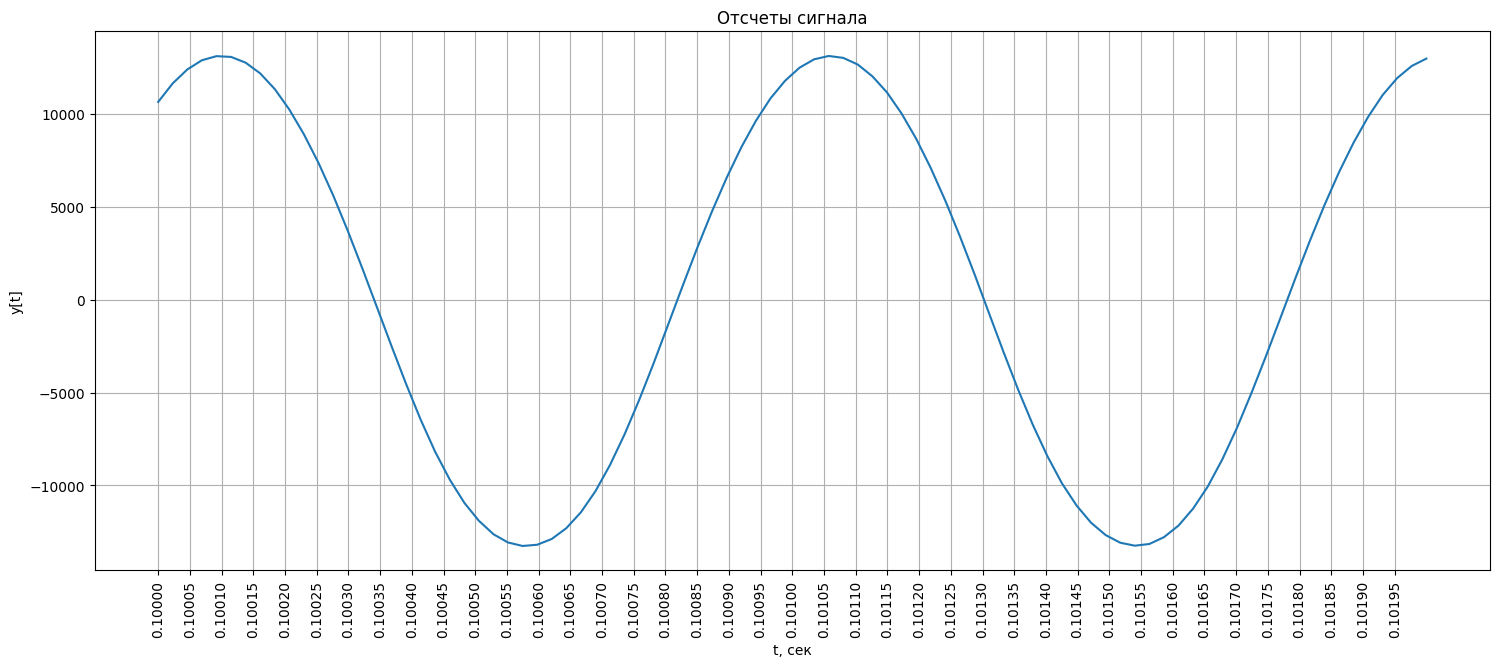

In [8]:
t_start = 0.1
t_stop = 0.102

start = int(t_start * samplerate)
stop = int(t_stop * samplerate)

sub_duration = (stop - start) / samplerate
sub_y_k = y_k[start:stop]
sub_t_k = np.linspace(t_start, t_stop, stop-start)

plt.figure(figsize=[18,7])
plt.xticks(np.arange(t_start, t_stop, 0.00005), rotation=90)

plt.grid()
plt.title('Отсчеты сигнала')
plt.xlabel('t, сек')
plt.ylabel('y[t]')

plt.plot(sub_t_k, sub_y_k)

In [9]:
f1 = 1055.375
f2 = 3162.6

T0 = 0.10105 - 0.10010
f0 = 1 / T0
print(f"f0 = {f0}\nf1 = {f1}\nf2 = {f2}")

f0 = 1052.6315789473613
f1 = 1055.375
f2 = 3162.6


## 1.2


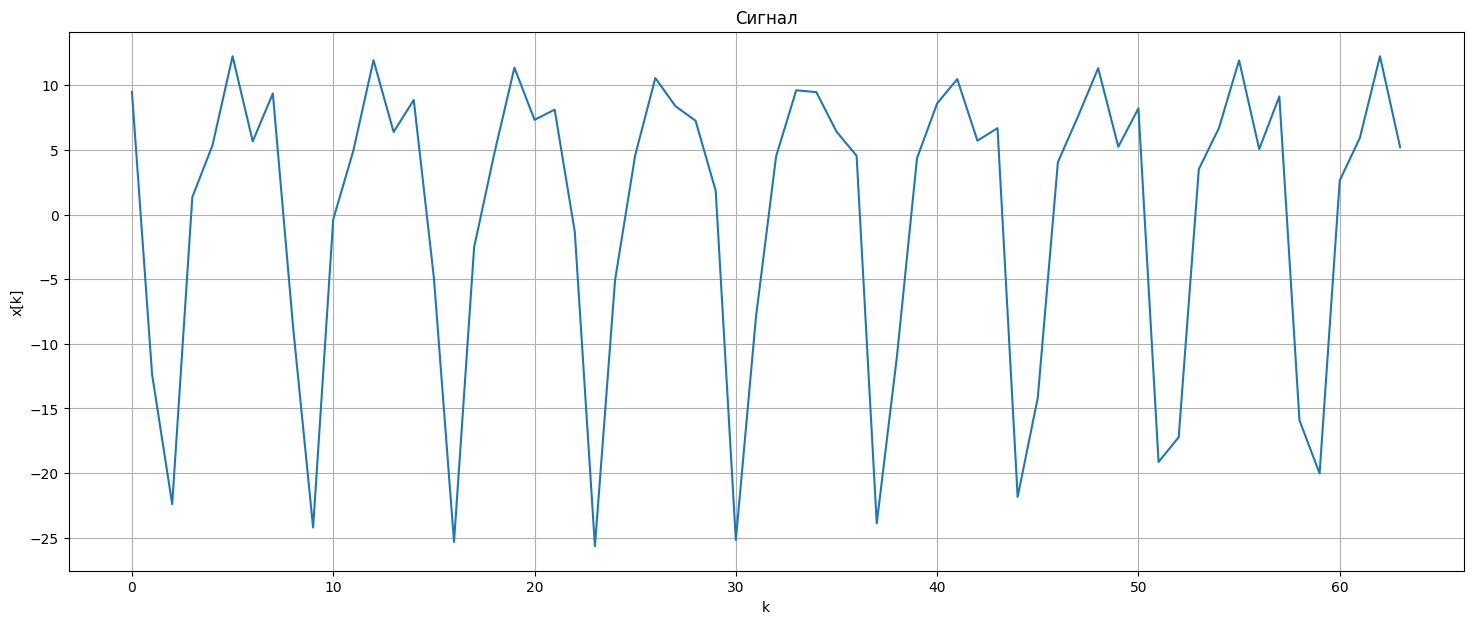

In [10]:
signal = np.load("data/variant_4_ex_1_2.npy")

n = len(signal)
k = np.arange(0, n)

plt.figure(figsize=[18,7])
plt.grid()
plt.title('Сигнал')
plt.xlabel('k')
plt.ylabel('x[k]')

plt.plot(k, signal)

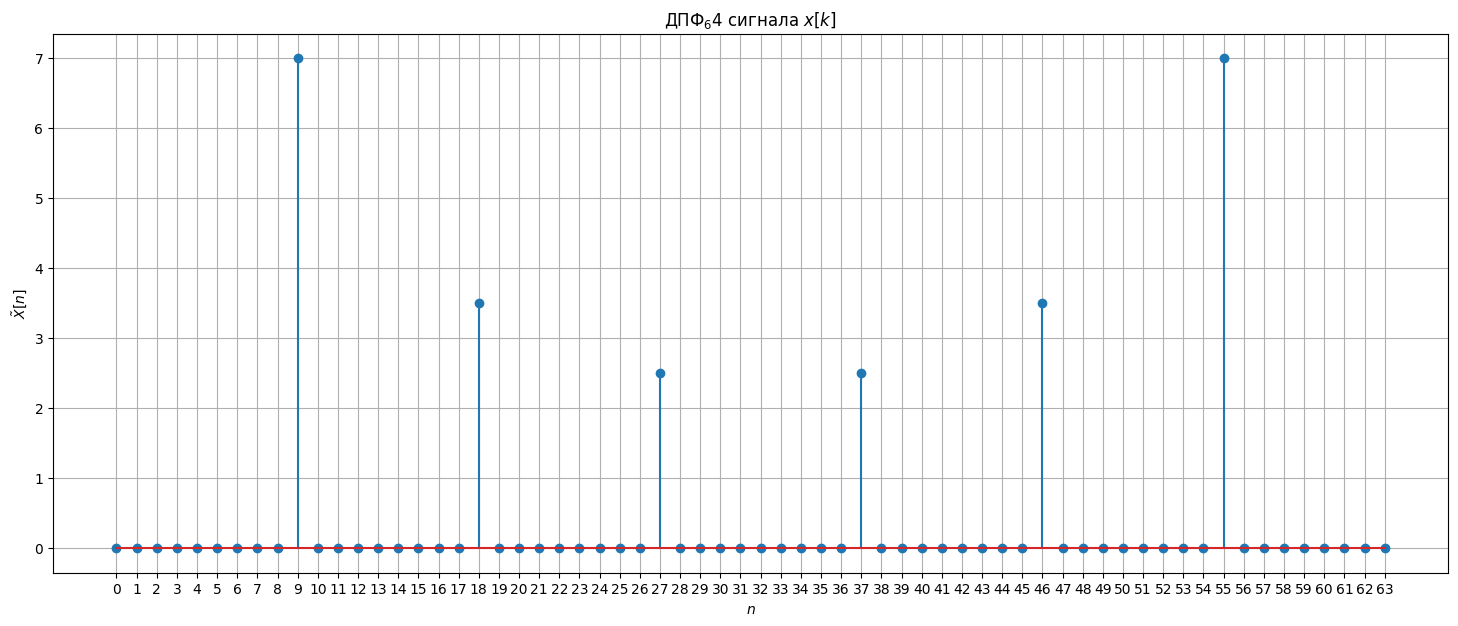

In [11]:
dft_signal = np.fft.fft(signal) / n

plt.figure(figsize=[18, 7])
plt.title(f"ДПФ$_{n}$ сигнала $x[k]$")
plt.xticks(np.arange(0, n, 1))
plt.stem(np.arange(dft_signal.size), abs(dft_signal))
plt.ylabel("$\\tilde{X}[n]$")
plt.xlabel("$n$")
plt.grid()
plt.show()

In [12]:
amplitudes_phases = np.array([[]]).reshape(-1, 3)

for idx, dft_value in enumerate(dft_signal):
    if np.abs(dft_value) <= 1e-6:
        continue

    amplitude = 2 * np.abs(dft_value)
    phase = np.angle(dft_value) + np.pi / 2

    amplitudes_phases = np.append(amplitudes_phases, [[idx, amplitude, phase]], axis=0)

In [13]:
for idx, amplitude, phase in amplitudes_phases:
    print(f"A_{int(idx)}\t= {amplitude:.2f}\tPhi_{int(idx)}\t= {(phase / np.pi):.2f} pi")

A_9	= 14.00	Phi_9	= 1.00 pi
A_18	= 7.00	Phi_18	= 0.50 pi
A_27	= 5.00	Phi_27	= 0.17 pi
A_37	= 5.00	Phi_37	= 0.83 pi
A_46	= 7.00	Phi_46	= 0.50 pi
A_55	= 14.00	Phi_55	= 0.00 pi


# Задание 2

## 2.1

In [14]:
N_v = 4
N = 20 + 2*N_v


In [15]:
def plot_window(window_name, N):

    window = scipy.signal.get_window(window_name, N)
    k = np.arange(N)

    fig = plt.figure(figsize=(18, 7))
    fig.suptitle(window_name)

    plt.subplot(1, 3, 1)
    plt.grid()
    plt.title(f"Временная область")
    plt.xlabel('$k$')
    plt.ylabel('$x[k]$')
    plt.stem(k, window)

    N_fft = 2**18
    nu, W = np.linspace(-0.5, 0.5, num=N_fft, endpoint=False), scipy.fft.fftshift(scipy.fft.fft(window, N_fft))

    plt.subplot(1, 3, 2)
    plt.grid()
    plt.title(f"АЧХ")
    plt.xticks(np.arange(nu.min(), nu.max(), 0.05), rotation=90)
    plt.yticks(np.arange(np.abs(W).min(), np.abs(W).max(), 1))
    plt.xlabel('$\\nu$')
    plt.ylabel('$|W(\\nu)|$')
    plt.plot(nu, np.abs(W))

    plt.subplot(1, 3, 3)
    plt.grid()
    plt.title(f"АЧХ дБ")
    plt.xticks(np.arange(nu.min(), nu.max(), 0.05), rotation=90)
    plt.ylim(-150, 10)

    with np.errstate(divide='ignore'):
        W_db = 20*np.log10(np.abs(W) / np.max(np.abs(W)))
        plt.yticks(np.arange(-150, 10, 10))
        plt.plot(nu, W_db)

    plt.xlabel('$\\nu$')
    plt.ylabel('$20 \lg \; |\\frac{W(\\nu)}{W(0)}|$, дБ')

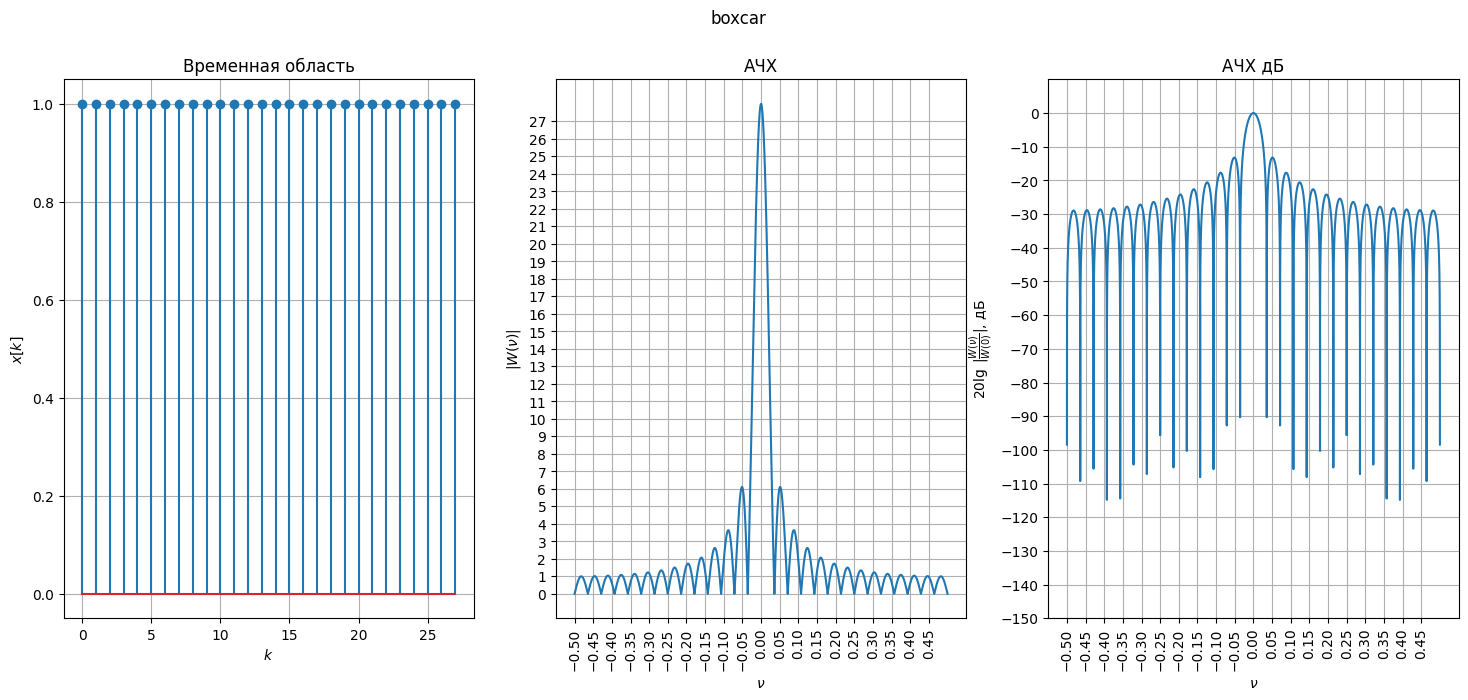

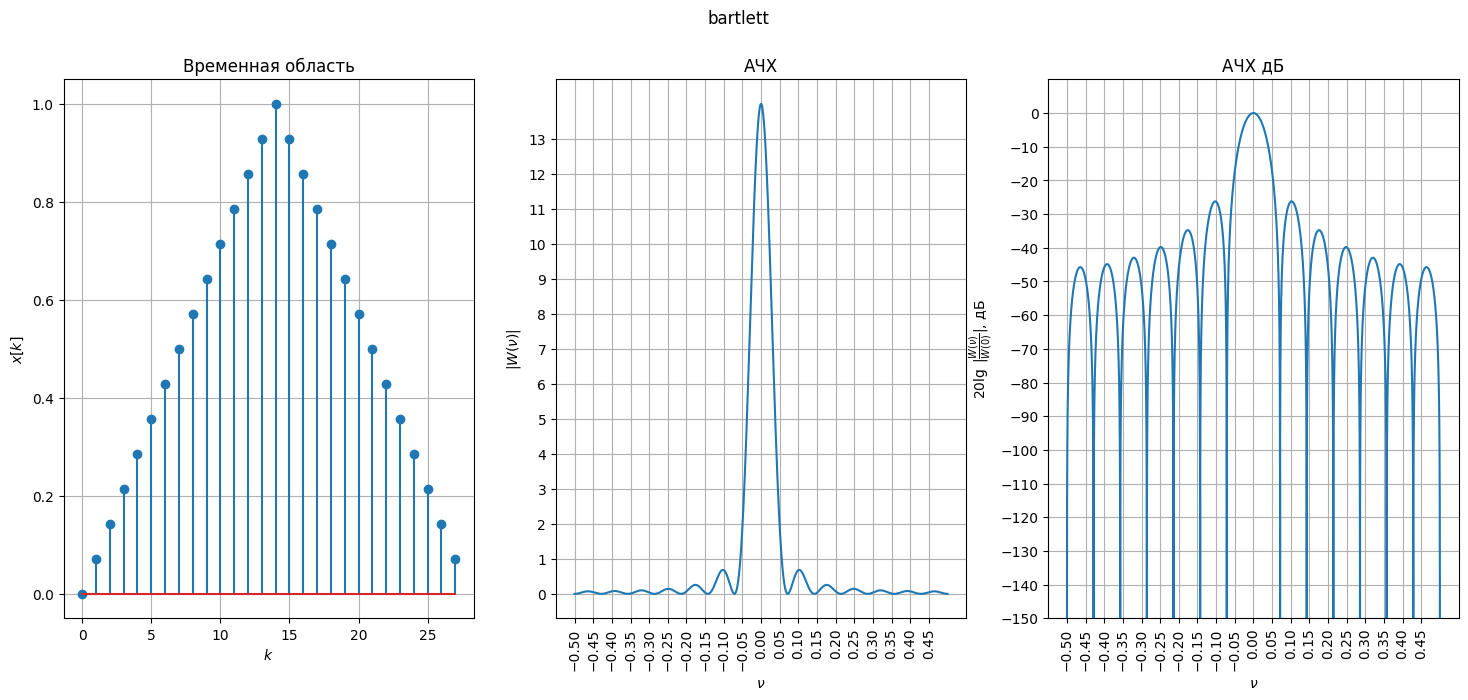

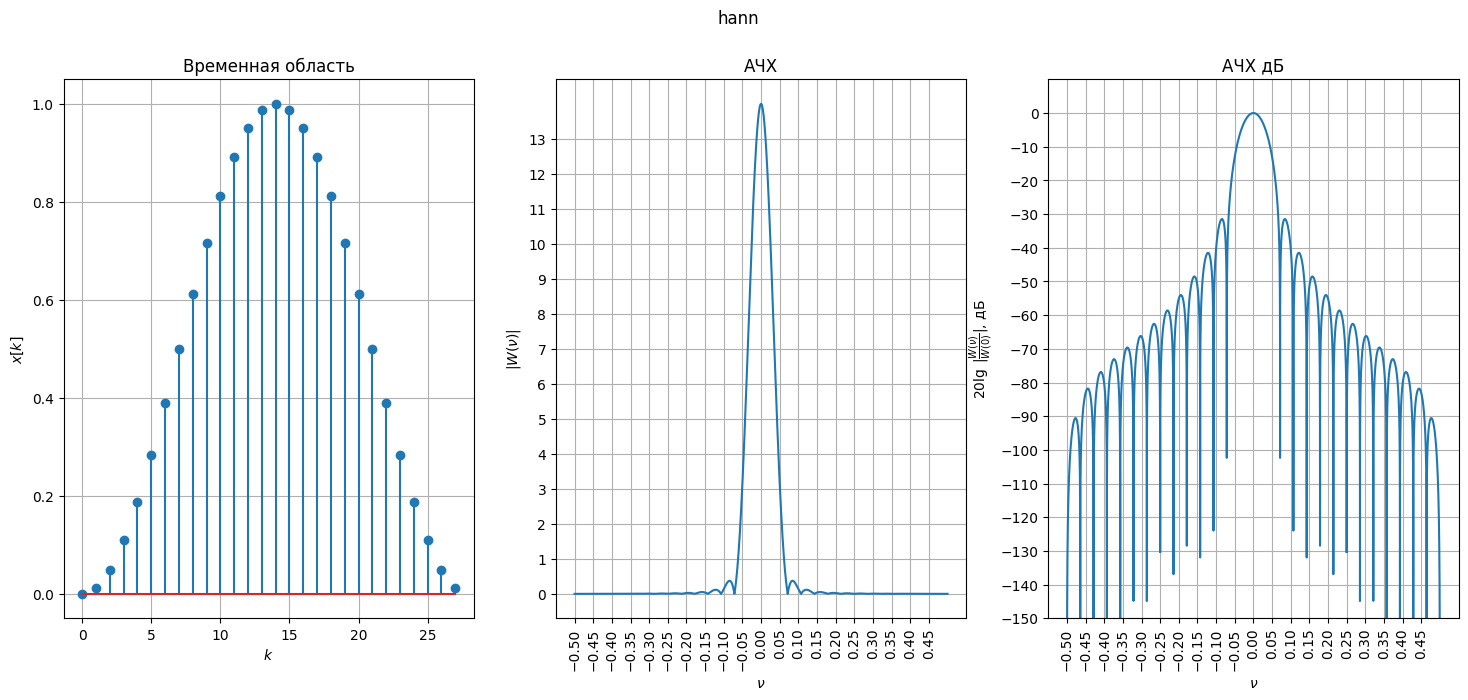

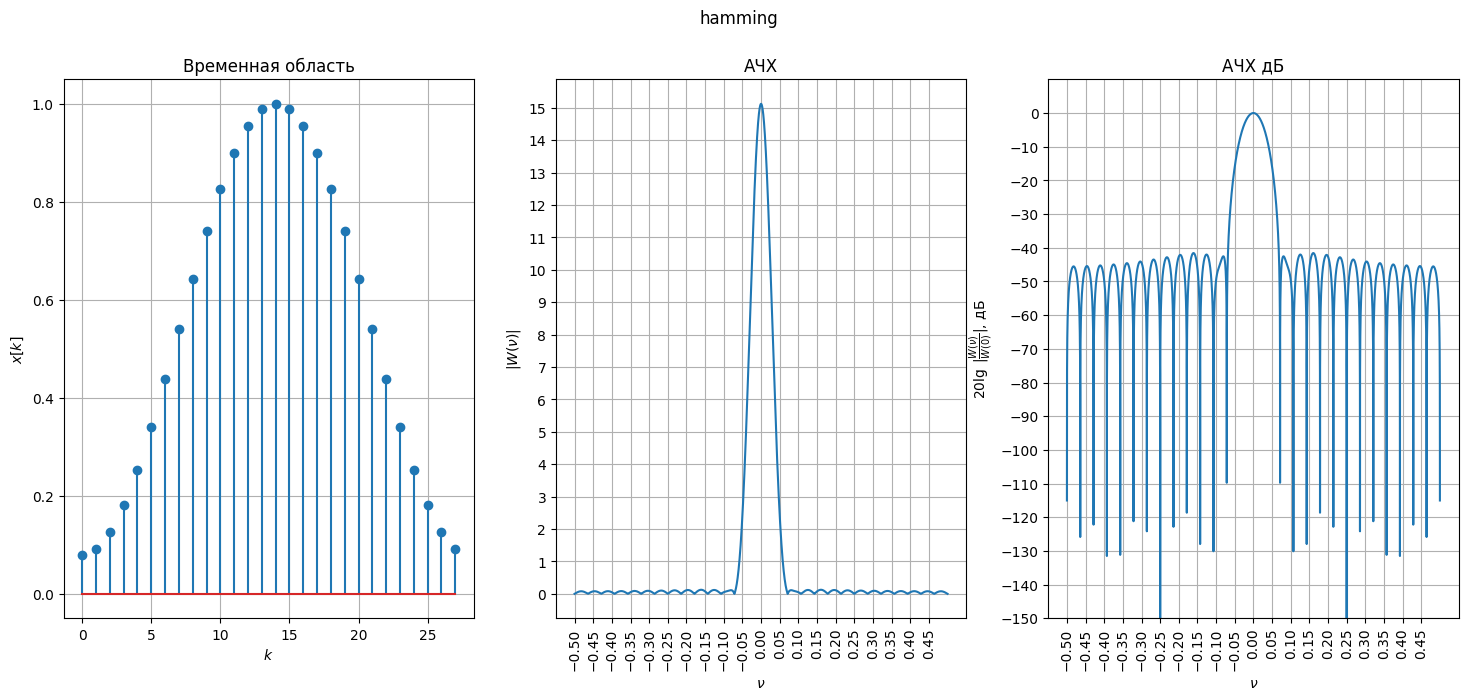

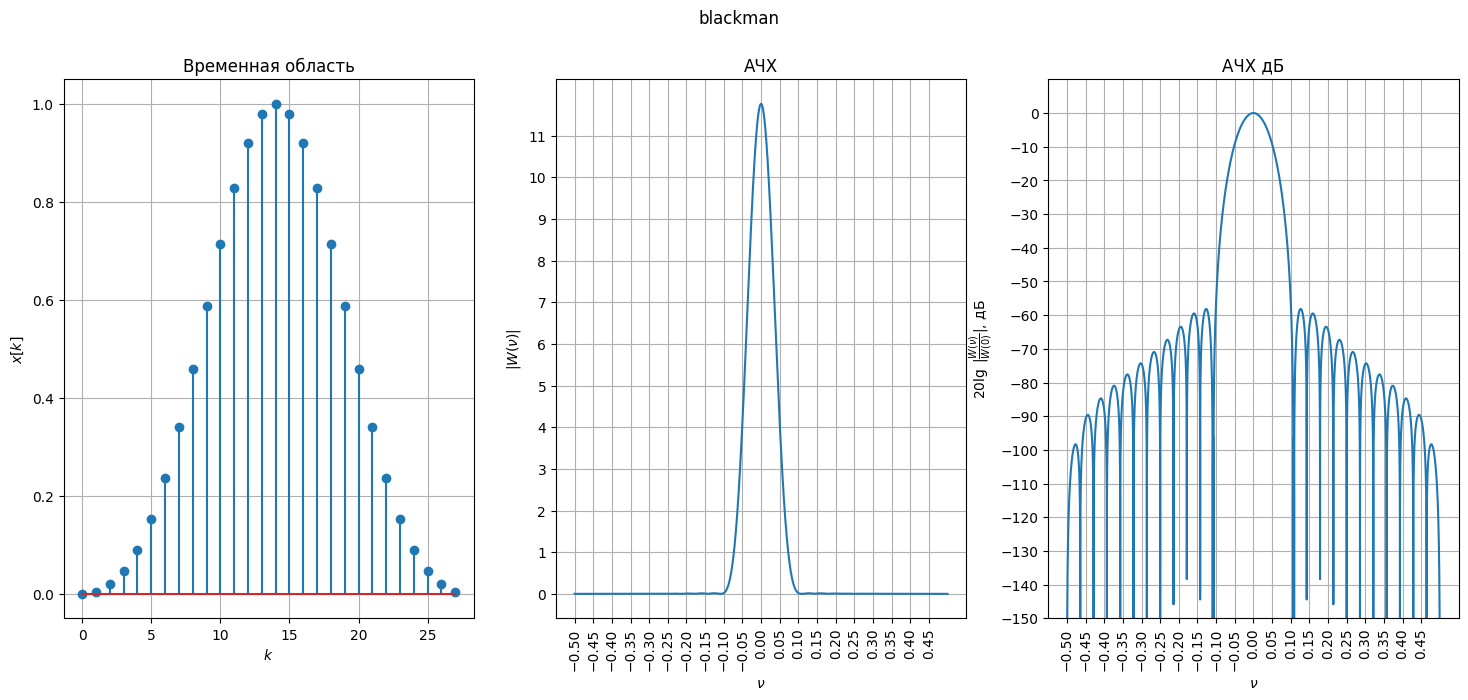

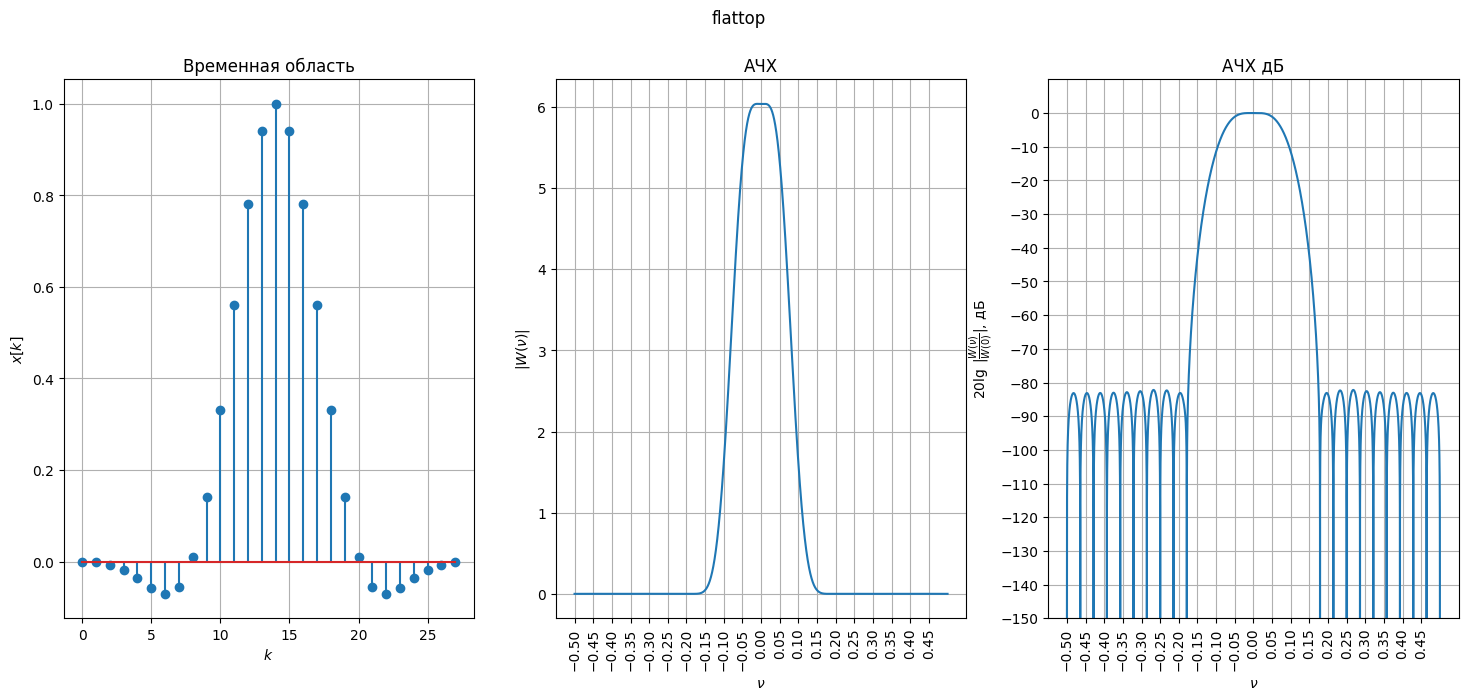

In [16]:
windows = [
    'boxcar',
    'bartlett',
    'hann',
    'hamming',
    'blackman',
    'flattop'
]

for window_name in windows:
    plot_window(window_name, N)

окно  | ширину $\Delta \nu$ главного лепестка на уровне половинной мощности | максимальный уровень боковых лепестков относительно главного в дБ  | асимптотическую скорость спада боковых лепестков в дБ/октава
-------------------|------------------  |--------------------|--------------
Прямоугольное      | 0.05               | -15                | 6
Барлетта           | 0.1                | -27                | 12
Ханна              | 0.1                | -32       | 18
Хэмминга           | 0.1                | -42      | 6
Блэкмана           | 0.15                | -58       | 18
Flattop            | 0.3                | -82      | -



## 2.2

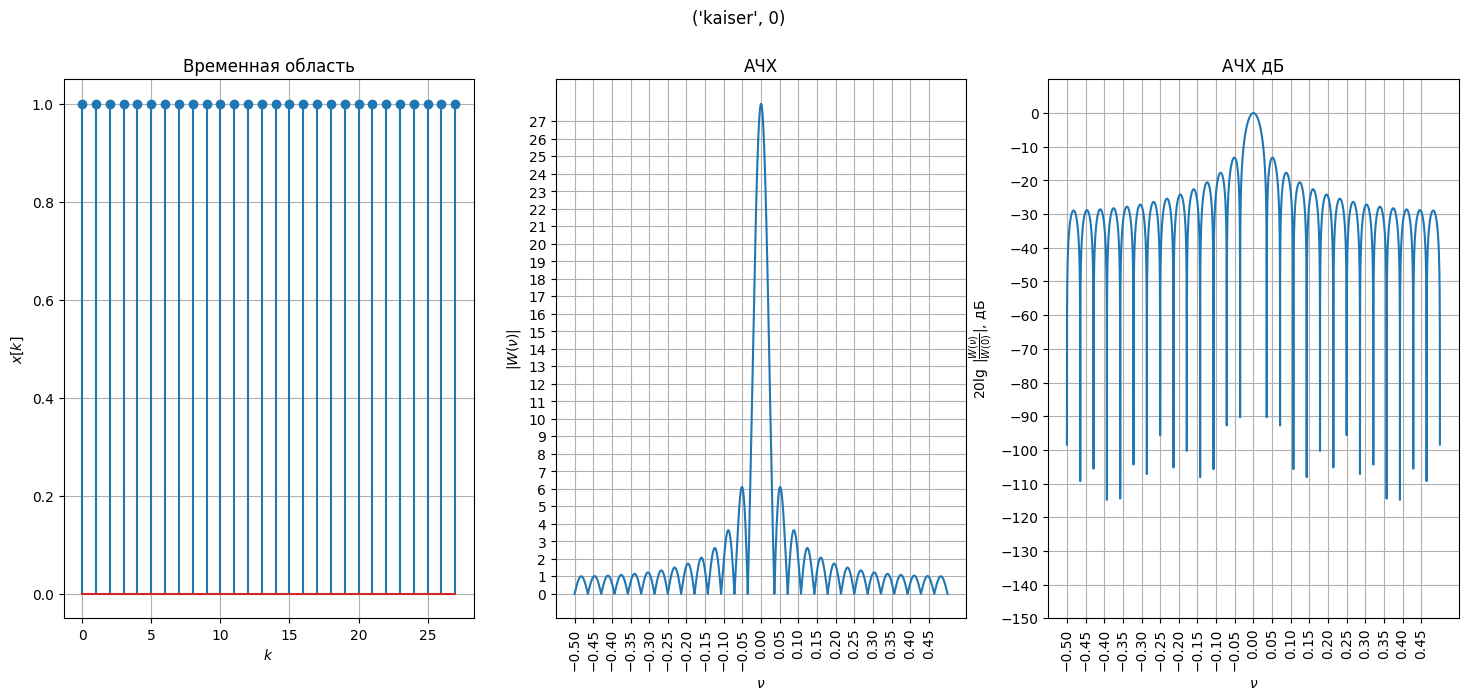

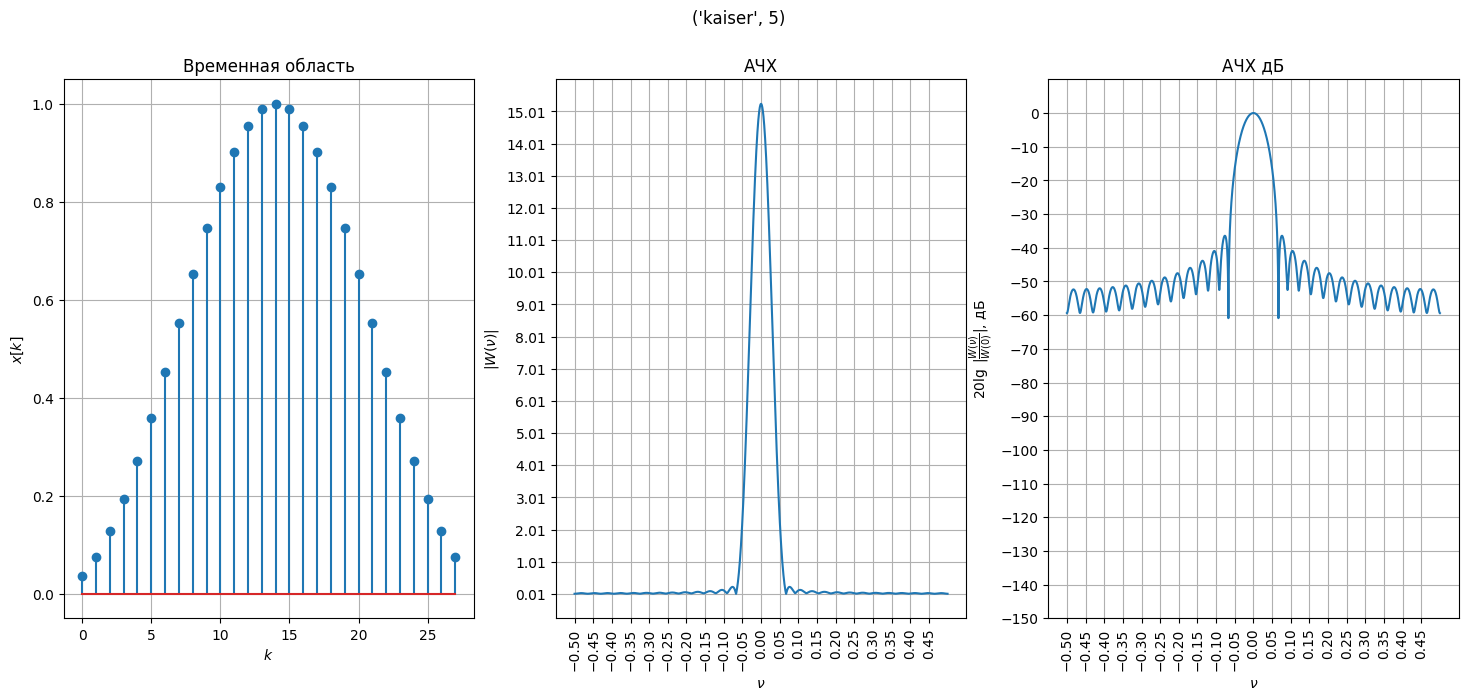

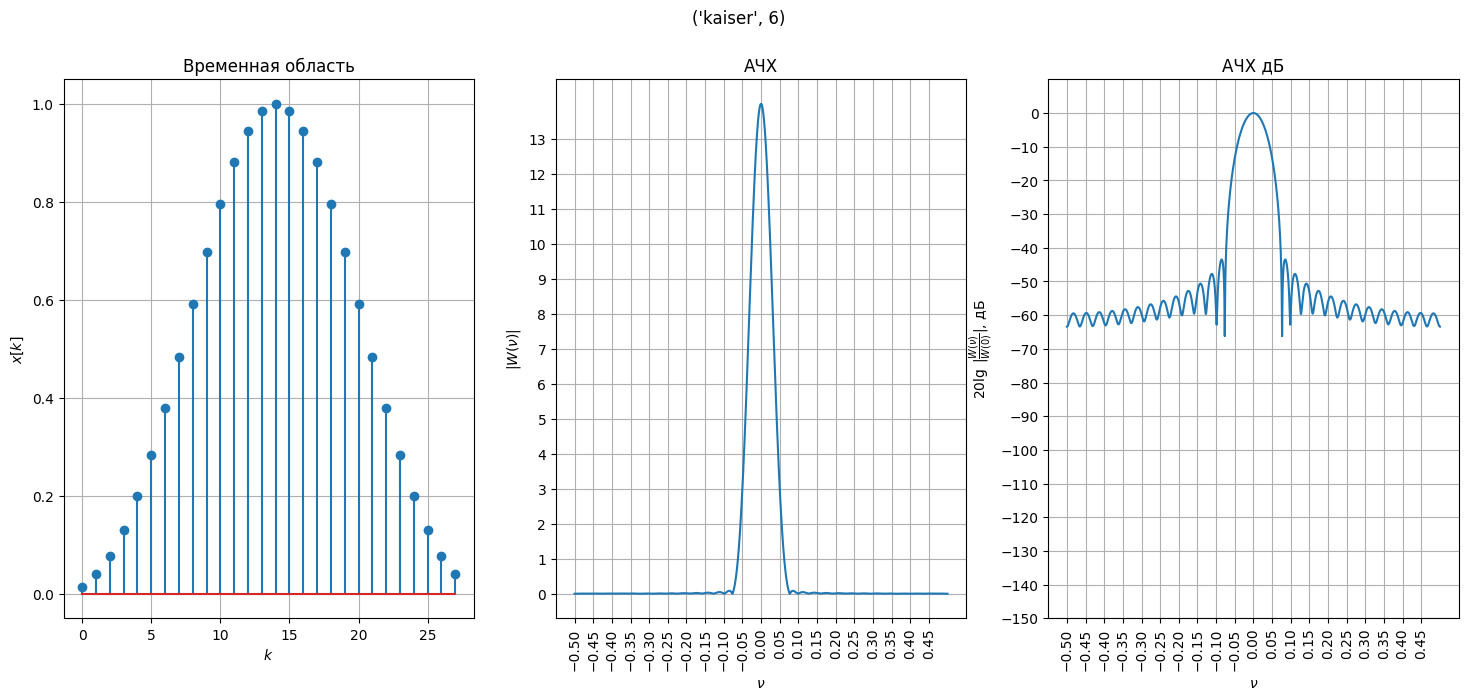

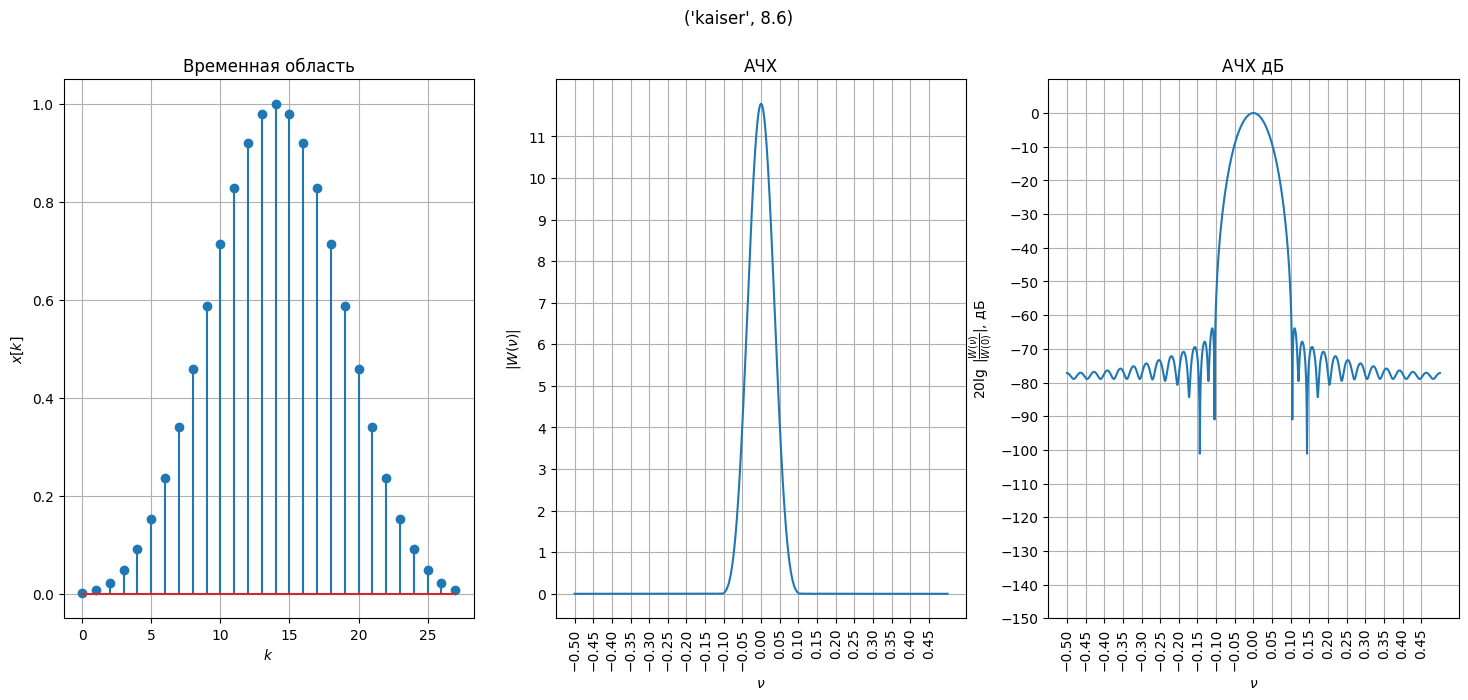

In [17]:
windows = [
    ('kaiser', 0),
    ('kaiser', 5),
    ('kaiser', 6),
    ('kaiser', 8.6),
]

for window_name in windows:
    plot_window(window_name, N)

## 2.3

/home/danny/.local/lib/python3.10/site-packages/scipy/signal/windows/_windows.py:2374: UserWarning: This window is not suitable for spectral analysis for attenuation values lower than about 45dB because the equivalent noise bandwidth of a Chebyshev window does not grow monotonically with increasing sidelobe attenuation when the attenuation is smaller than about 45 dB.
  return winfunc(*params, sym=sym)


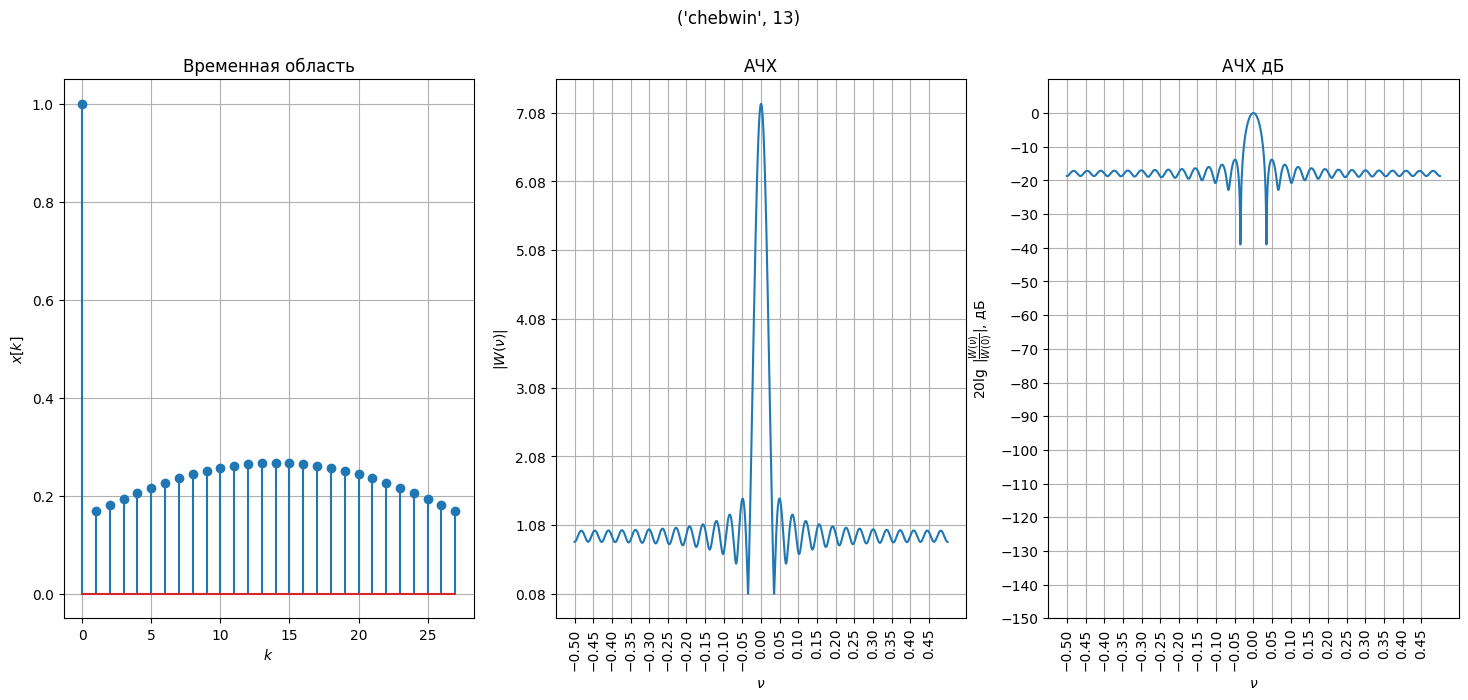

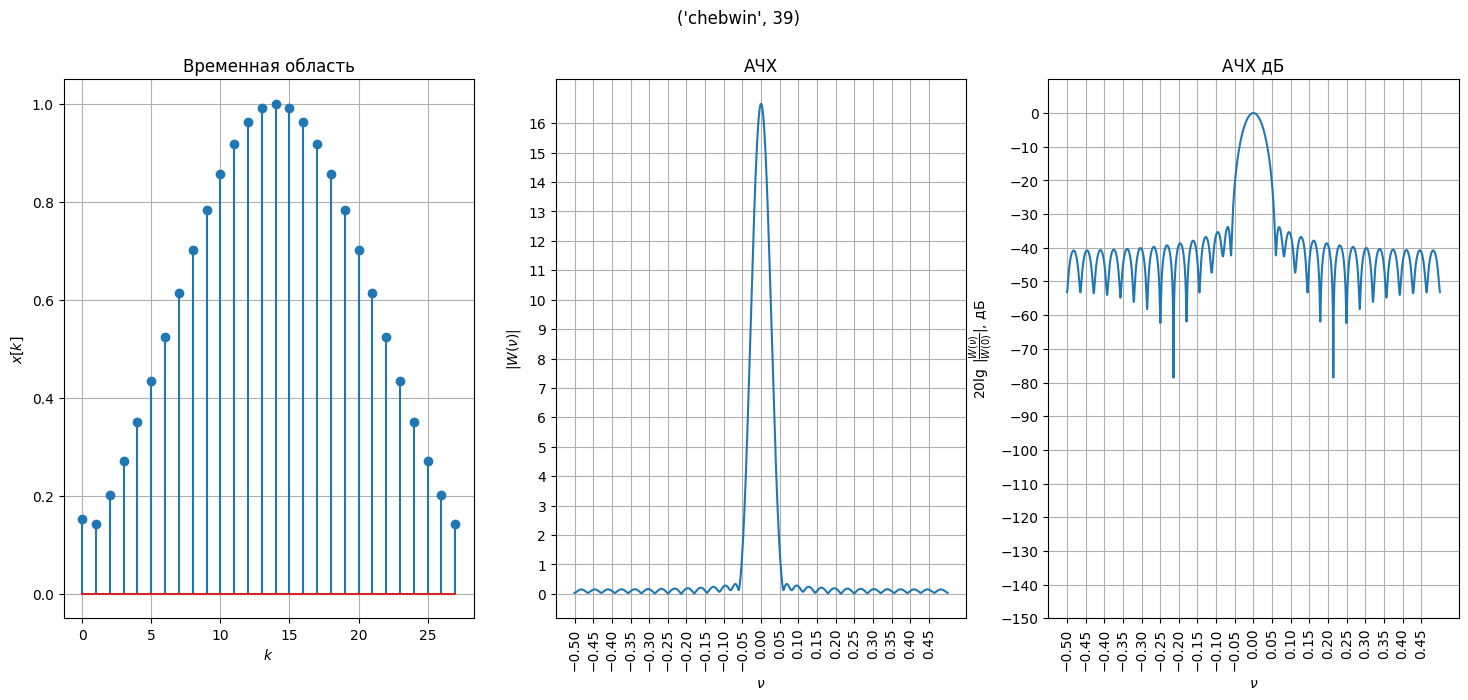

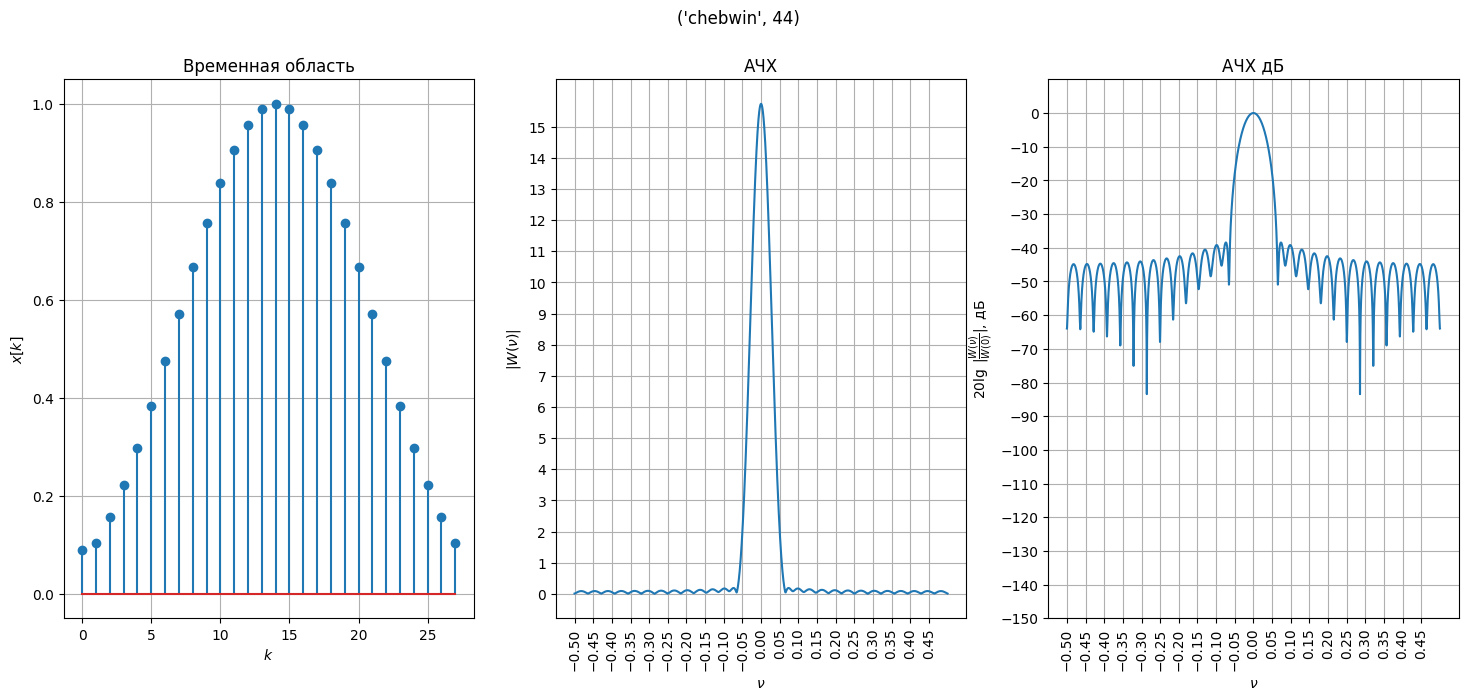

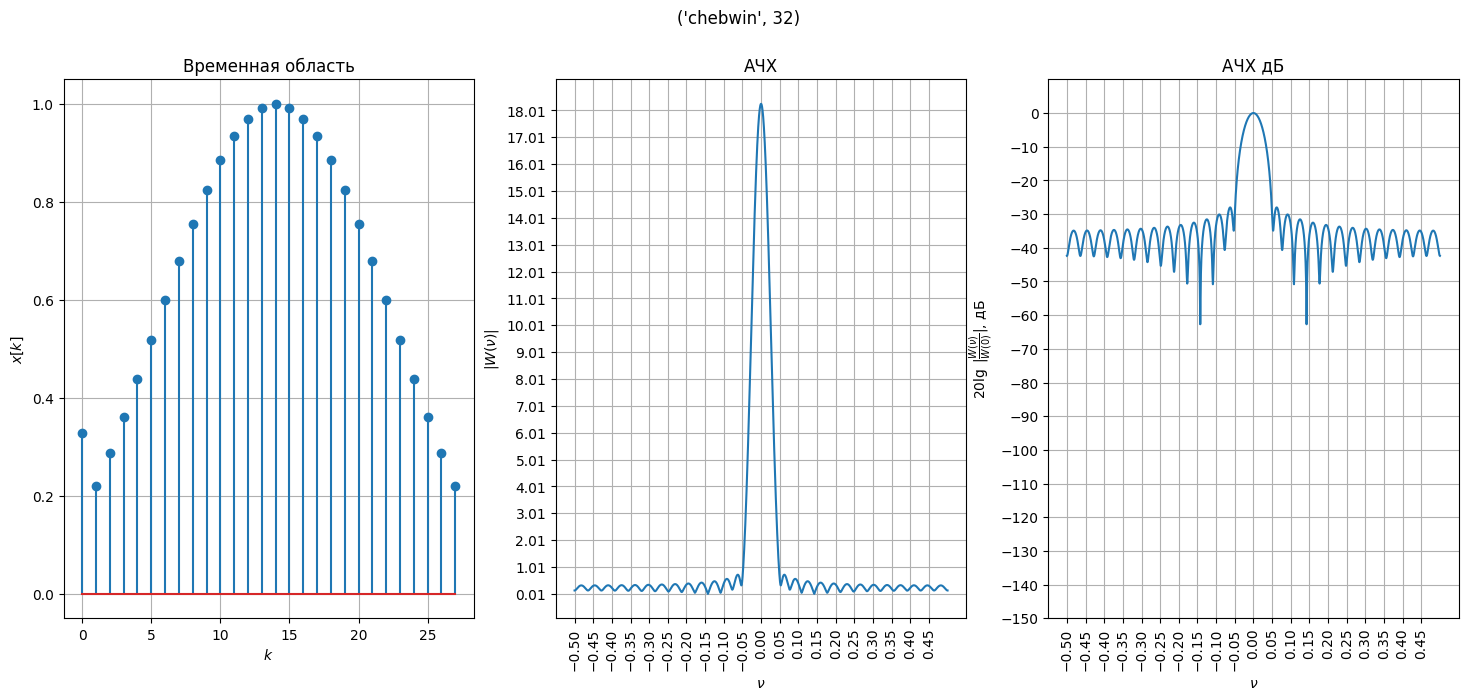

In [18]:
windows = [
    ('chebwin', 13),
    ('chebwin', 39),
    ('chebwin', 44),
    ('chebwin', 32),
]

for window_name in windows:
    plot_window(window_name, N)



## 2.4

In [19]:
n0 = 17
beta0 = 1.5
beta1 = 5.7
N = 128
M = 2048

x_k = np.zeros(N)
for k in range(N):
    x_k[k] =  np.cos(2 * np.pi * n0 * k / 128) + np.cos(2 * np.pi * (n0 + 2) * k / 128)


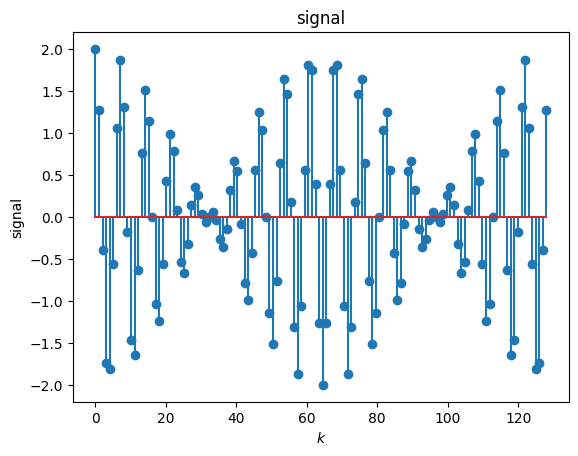

In [20]:
plot_signal(x_k)

In [21]:
def spectral_analizis(x_k, window_name):
    window = scipy.signal.get_window(window_name, N)

    y_k = np.zeros(N)
    for i in range(N):
        y_k[i] = x_k[i] * window[i]

    dft_y_k = np.fft.fftshift(np.fft.fft(y_k, M))
    nu = np.arange(M) / M - 0.5

    plt.rcParams.update({'font.size': 30})
    plt.figure(figsize=(70, 20))

    plt.xlim(nu.min(), nu.max())
    plt.xticks(np.arange(nu.min(), nu.max(), 0.05))

    plt.ylim(0, np.abs(dft_y_k).max() + 10)
    plt.yticks(np.arange(0, np.abs(dft_y_k).max() + 10, 10))

    plt.grid()
    plt.title(window_name)
    plt.xlabel('nu')
    plt.ylabel('|W(nu)|')

    plt.stem(nu, np.abs(dft_y_k))
    plt.rcParams.update({'font.size': 8})


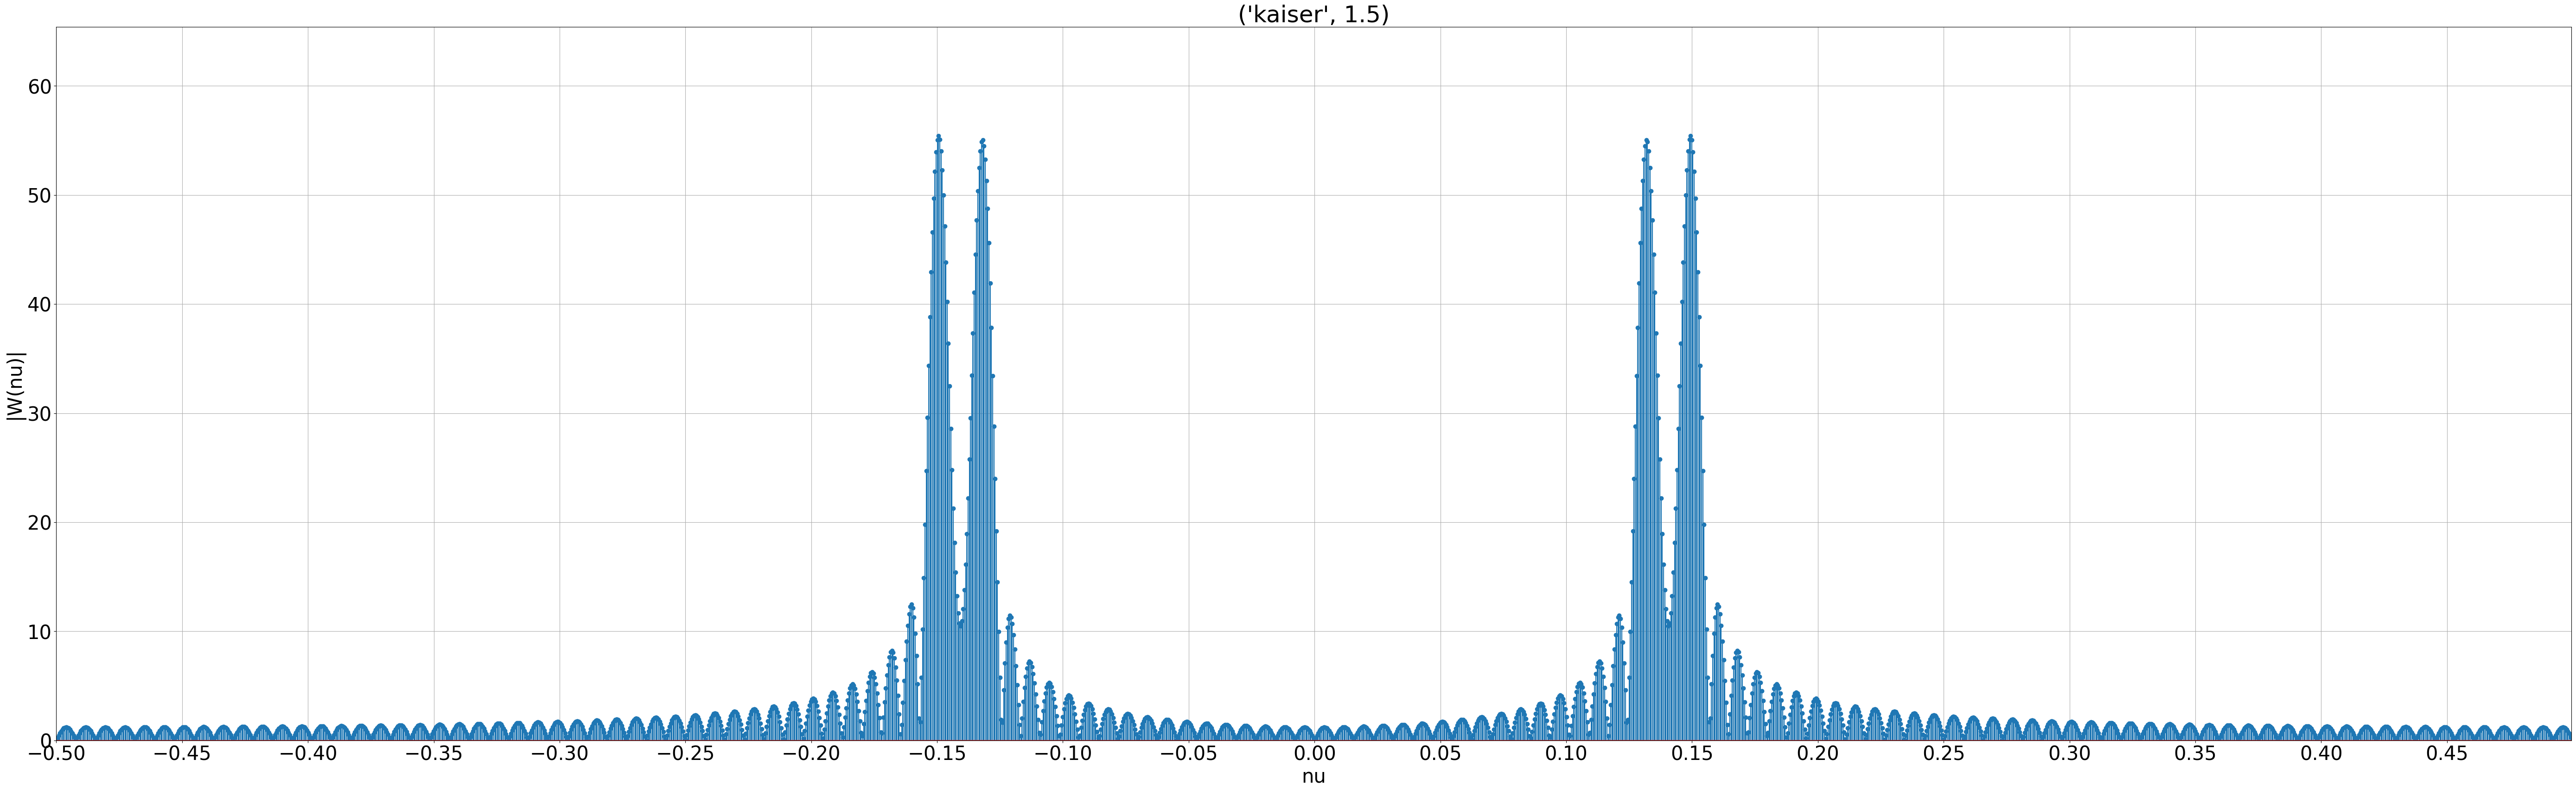

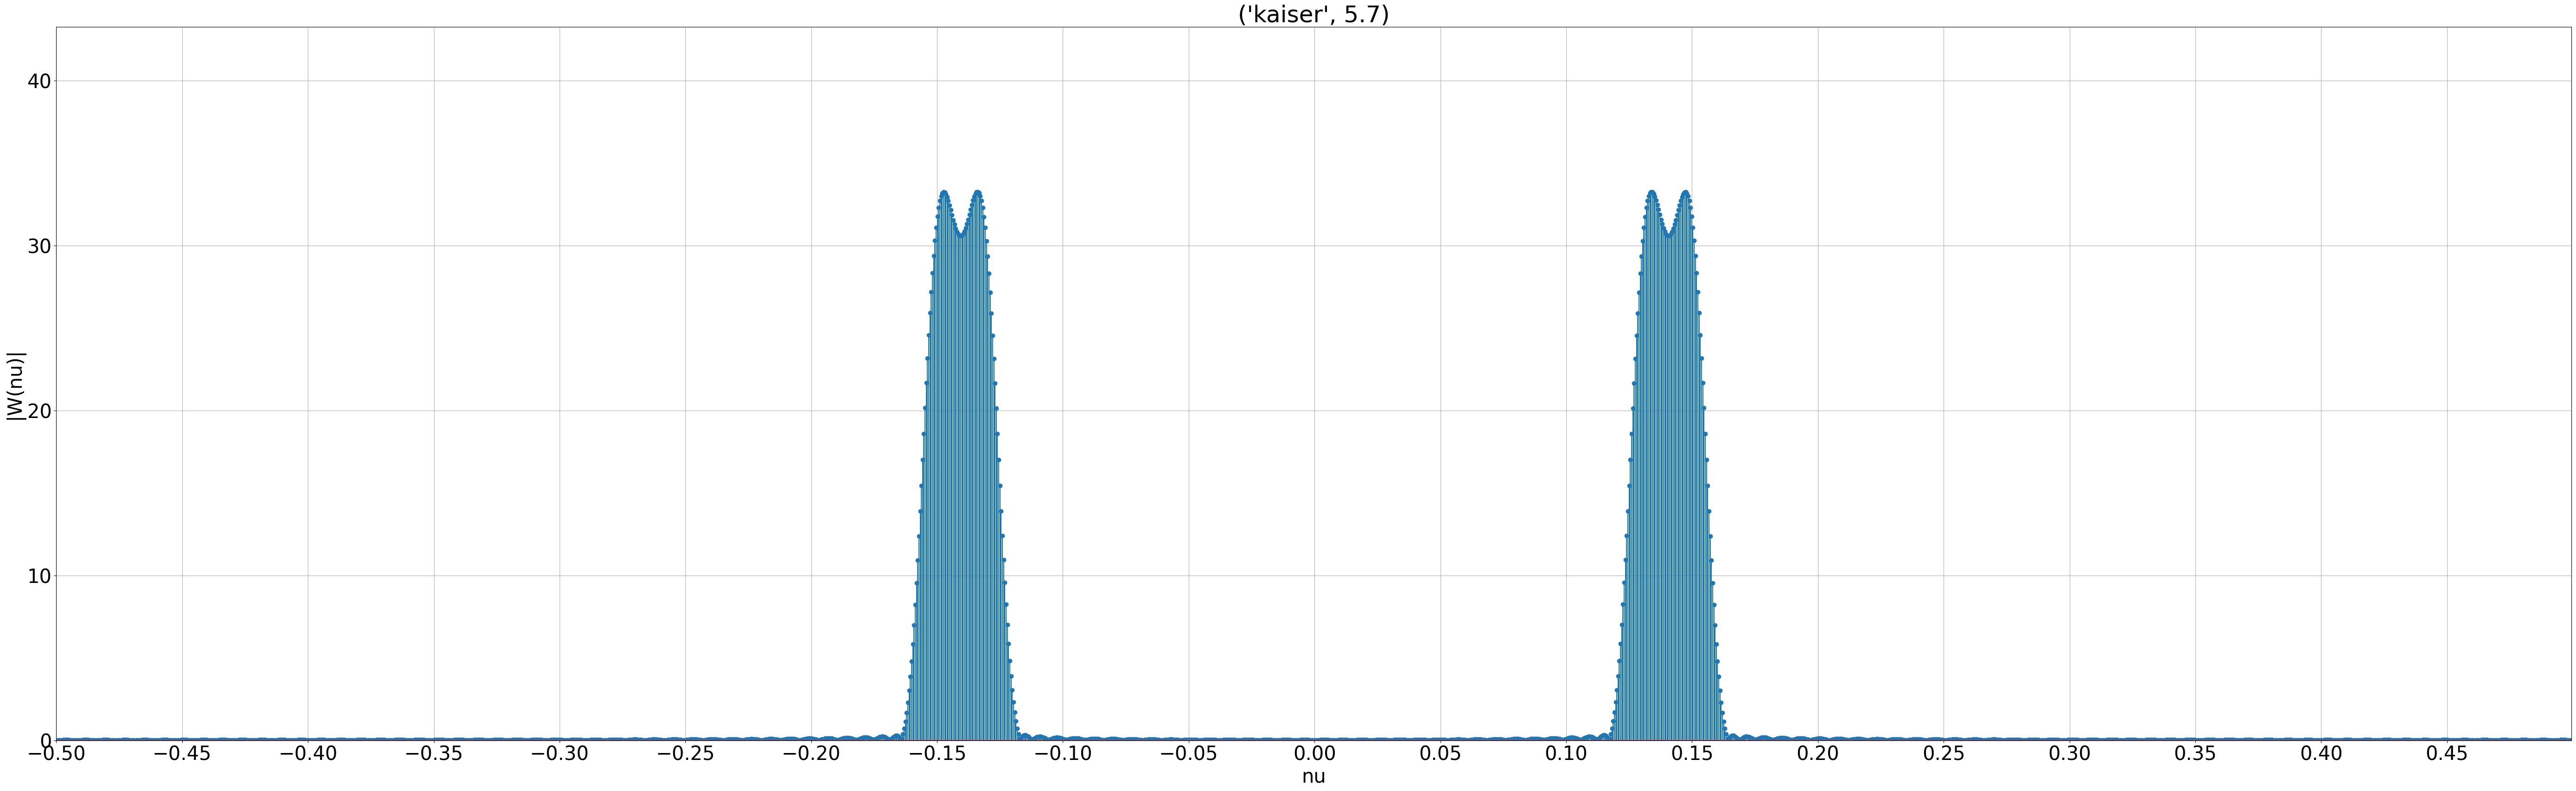

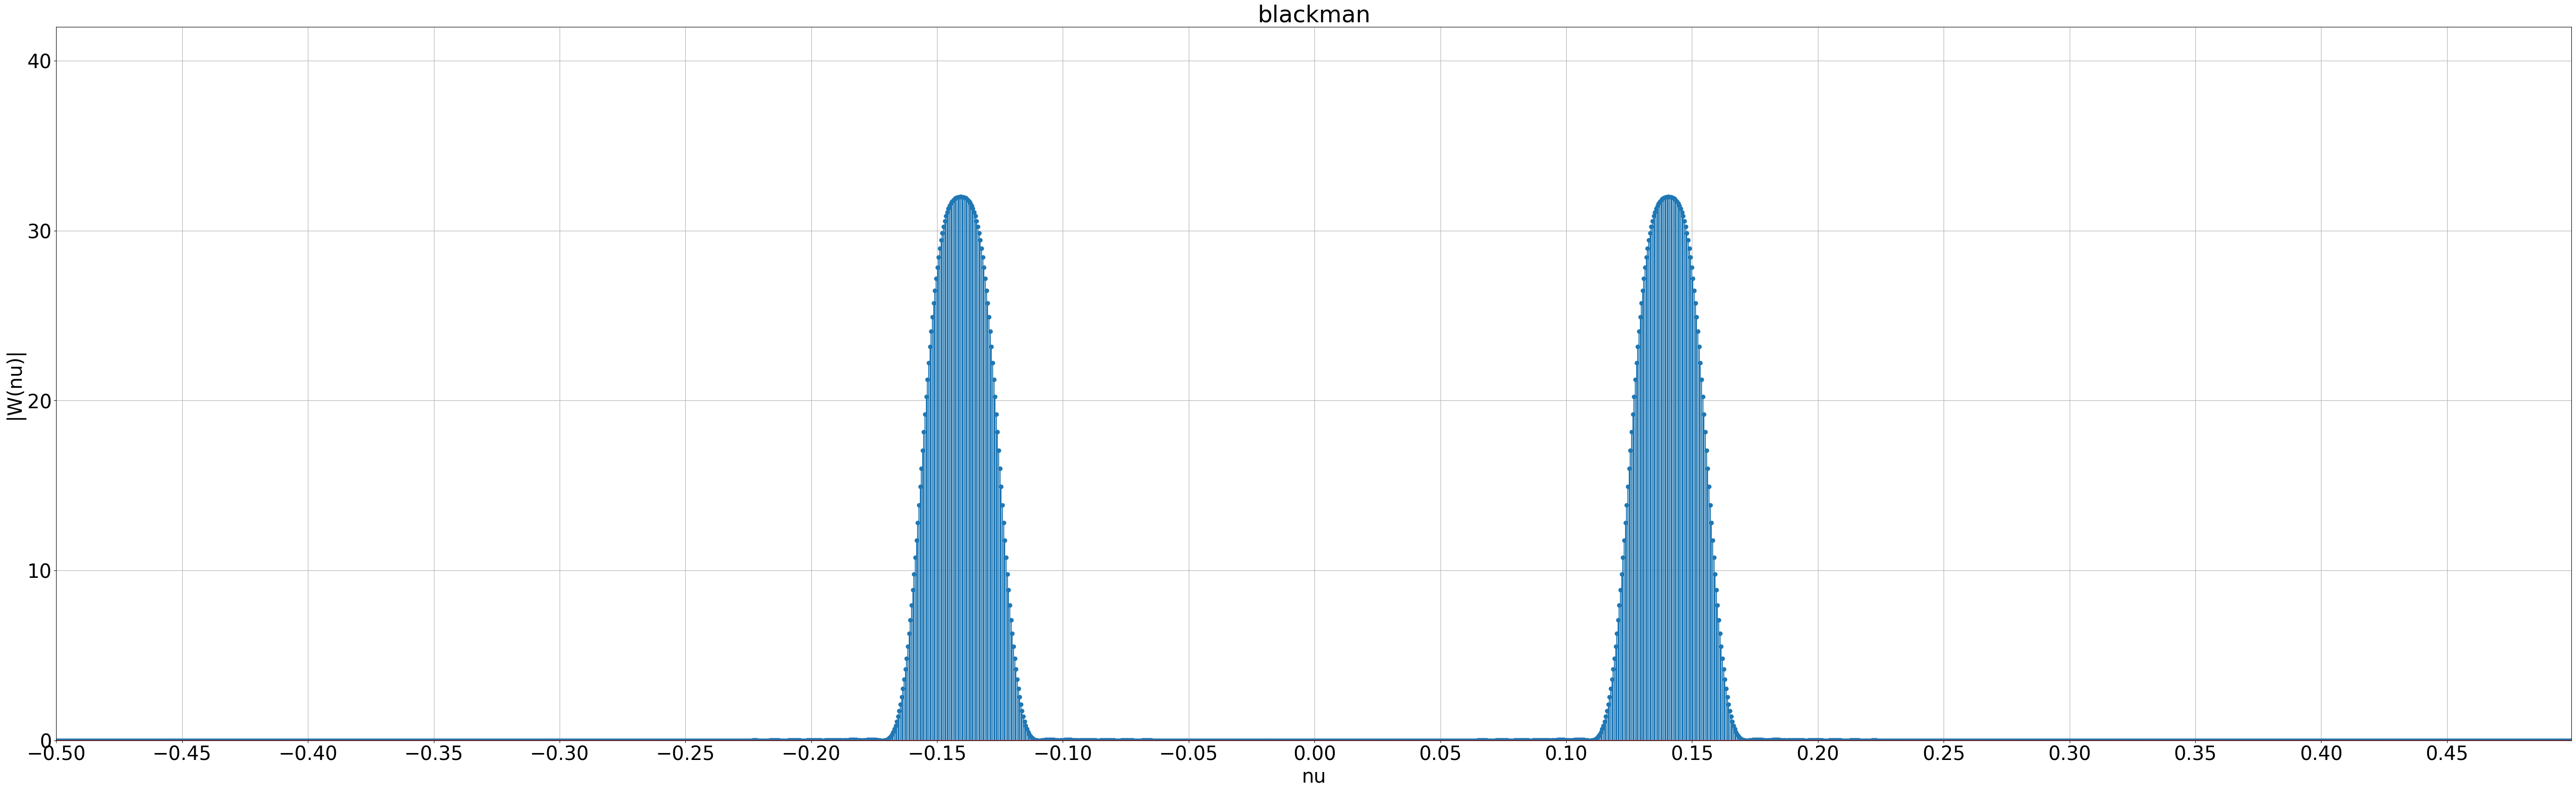

In [22]:
windows = [
    ('kaiser', beta0),
    ('kaiser', beta1),
    "blackman"
]

for window_name in windows:
   spectral_analizis(x_k, window_name)


## 2.5

In [23]:
N = 64
n = 4096

N_v = 4
m2 = 2
m3 = 4
optional_window = "hann"

a1 = 10 + N_v
a2 = a1 / 6
a3 = a1 / 2

x_k = np.zeros(N)
for k in range(N):
    x_k[k] = a1 * np.cos(2 * np.pi * (a1)      * k / N) \
           + a2 * np.cos(2 * np.pi * (a1 + m2) * k / N) \
           - a3 * np.cos(2 * np.pi * (a1 + m3) * k / N)

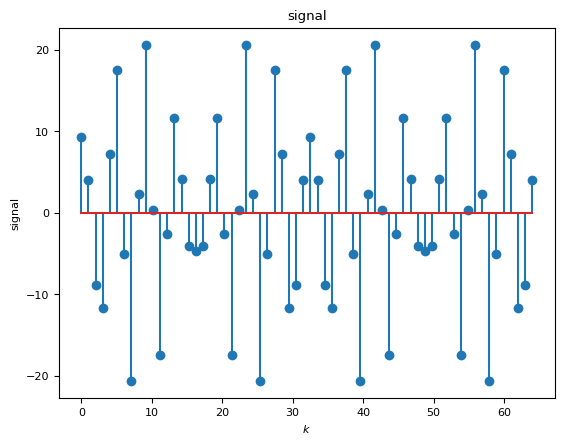

In [24]:
plot_signal(x_k)

In [25]:
def plot_dtft_with_window(x_k, window_name):
    window = scipy.signal.get_window(window_name, N)

    y_k = np.zeros(N)
    for i in range(N):
        y_k[i] = x_k[i] * window[i]

    dft_y_k = np.fft.fftshift(np.fft.fft(y_k, n))
    nu = np.arange(n) / n - 0.5

    plt.figure(figsize=(12, 7))

    plt.xlim(nu.min(), nu.max())
    plt.xticks(np.arange(nu.min(), nu.max(), 0.05))

    plt.ylim(0, np.abs(dft_y_k).max() + 50)
    plt.yticks(np.arange(0, np.abs(dft_y_k).max() + 50, 50))


    plt.grid()
    plt.title(window_name)
    plt.xlabel('nu')
    plt.ylabel('|W(nu)|')

    plt.plot(nu, np.abs(dft_y_k))

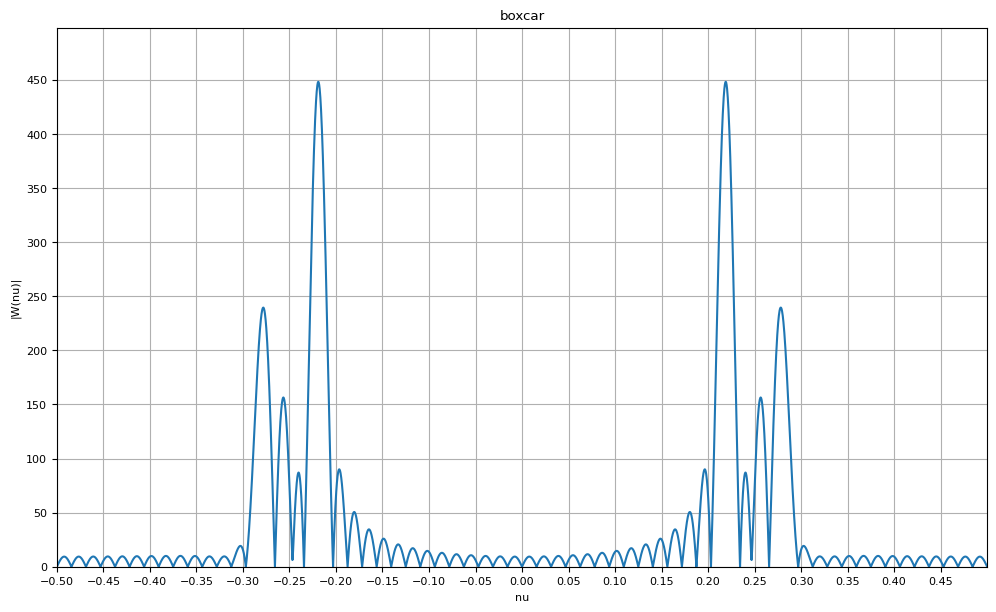

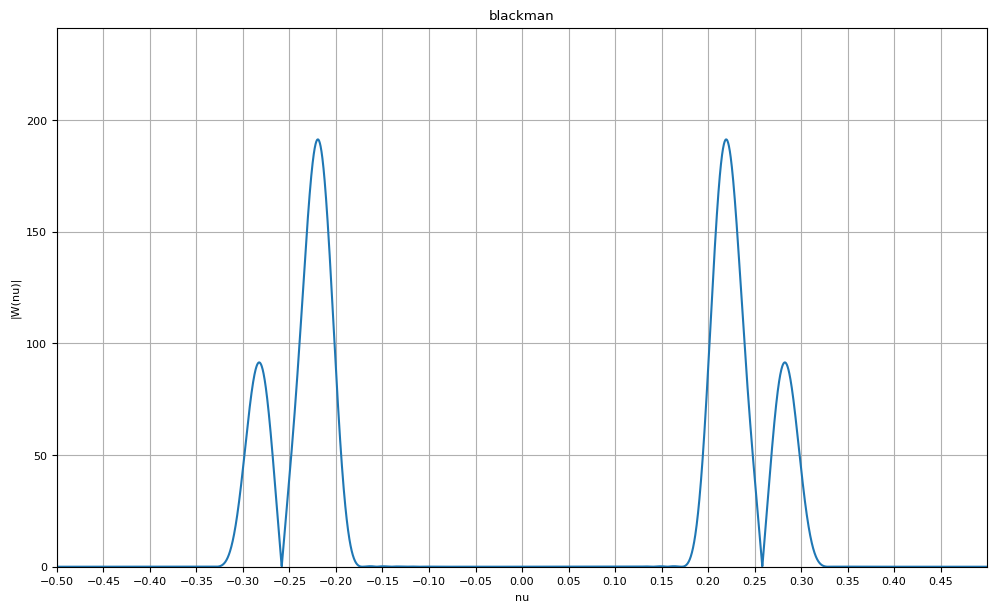

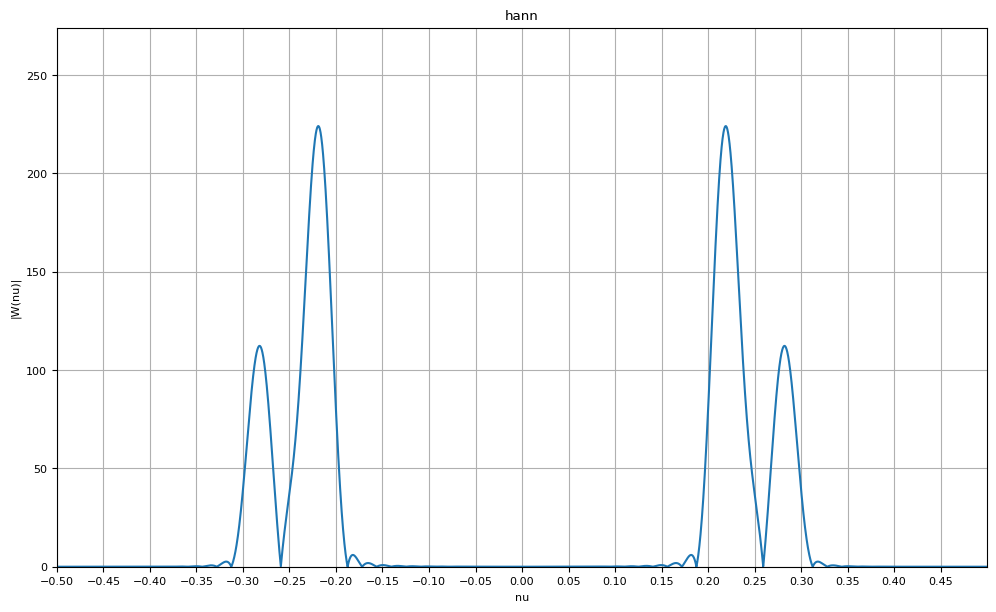

In [26]:
windows = [
    "boxcar",
    "blackman",
    optional_window
]

for window_name in windows:
    plot_dtft_with_window(x_k, window_name)

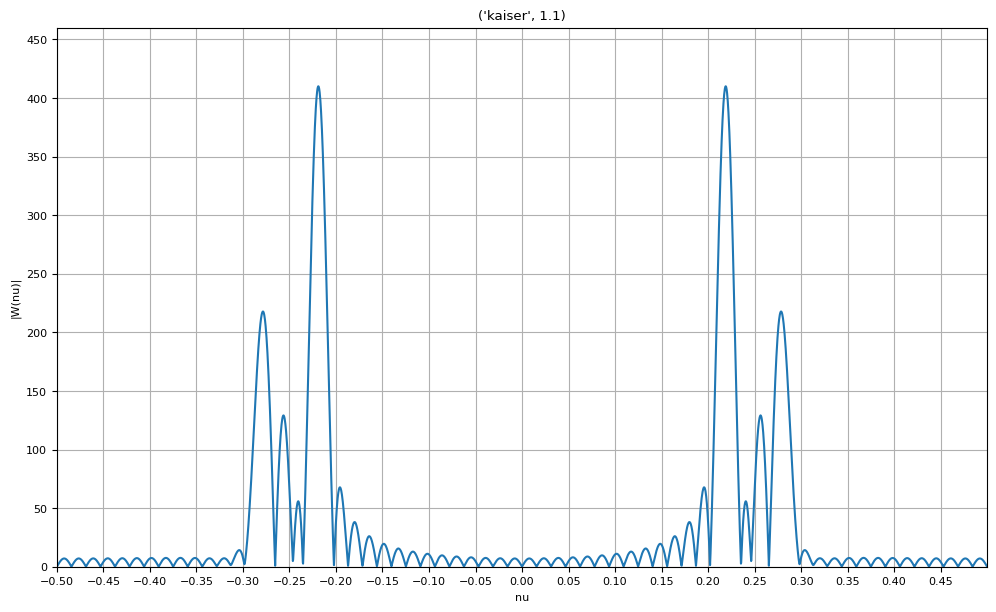

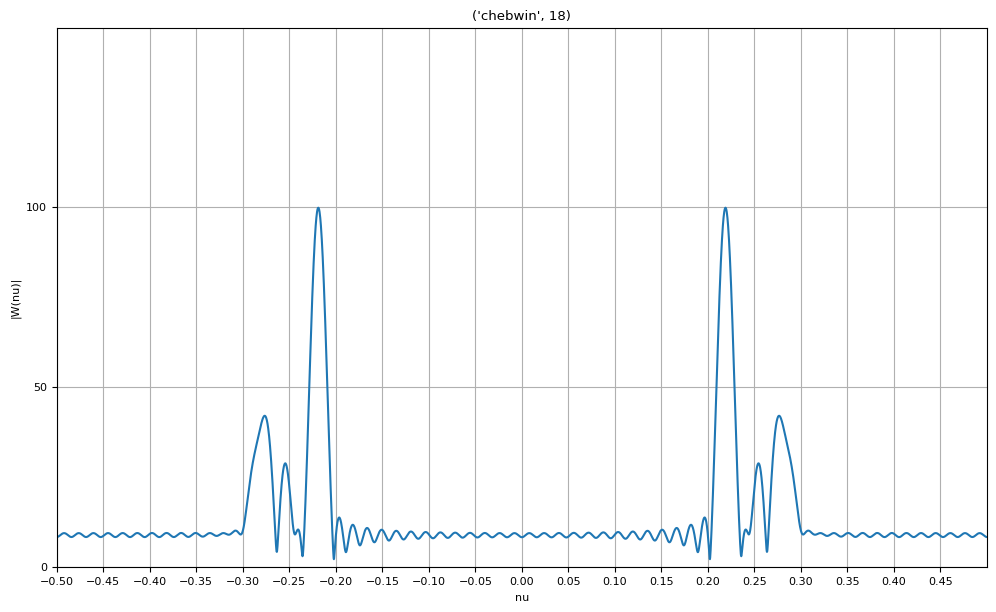

In [27]:
windows = [
    ("kaiser", 1.1),
    ("chebwin", 18),
]

for window_name in windows:
    plot_dtft_with_window(x_k, window_name)

## 2.6

In [28]:
n0 = 17.5
N = 128

x_k = np.zeros(N)
for k in range(N):
    x_k[k] = np.cos(2 * np.pi * n0 * k / N)

In [29]:

def spectral_analizis_modulation(x_k, window_name):
    window = scipy.signal.get_window(window_name, N)

    y_k = np.zeros(N)
    for i in range(N):
        y_k[i] = x_k[i] * window[i]

    dft_y_k = np.fft.fftshift(np.fft.fft(y_k))
    dft_y_k = dft_y_k / np.max(np.abs(dft_y_k))
    nu = np.arange(N) / N - 0.5

    plt.figure(figsize=[12, 7])

    plt.xlim(nu.min(), nu.max())
    plt.xticks(np.arange(nu.min(), nu.max(), 0.1))

    plt.ylim(0, np.abs(dft_y_k).max() + 0.1)
    plt.yticks(np.arange(0, np.abs(dft_y_k).max() + 0.1, 0.1))


    plt.grid()
    plt.title(window_name)
    plt.xlabel('nu')
    plt.ylabel('|W(nu)|')

    plt.stem(nu, np.abs(dft_y_k))
    print(np.abs(dft_y_k[int(np.ceil(N // 2 - n0))]))
    print(np.abs(dft_y_k[int(np.ceil(N // 2 - n0) - 1)]))

0.9790507948320548
0.9999999999999999
0.9999999999999999
0.9999769662885719


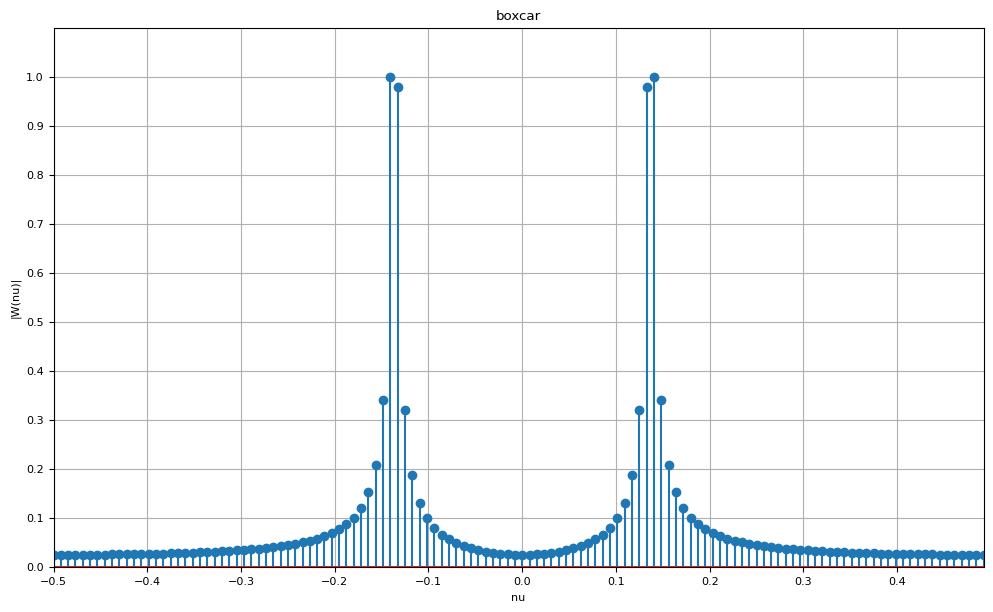

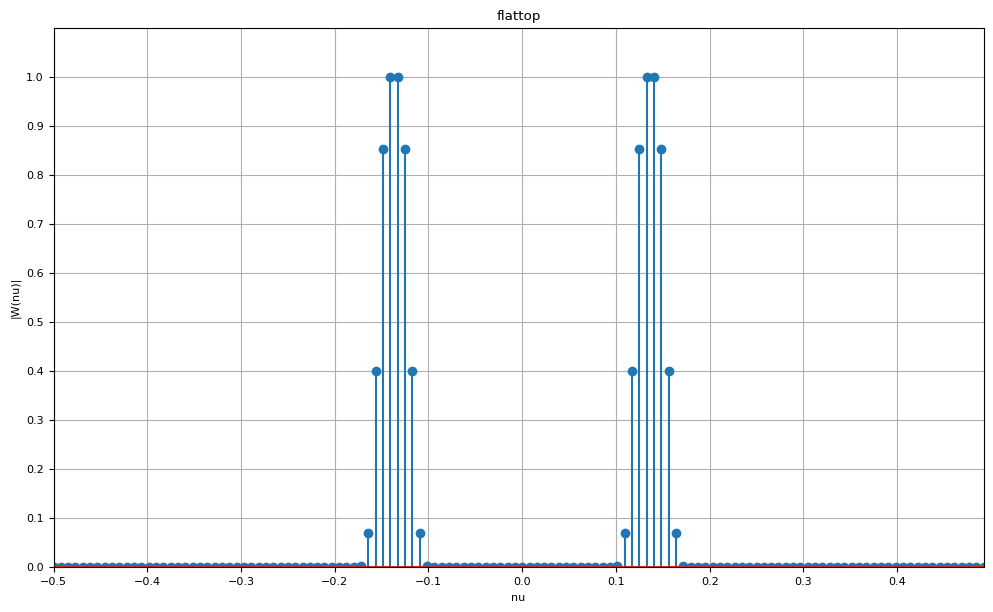

In [30]:
windows = [
    'boxcar',
    'flattop'
]

for window_name in windows:
    spectral_analizis_modulation(x_k, window_name)


# Задание 3

## 3.1

In [31]:
samplerate, wav_data = wavfile.read("data/major_scale_flute2.wav")
print(f"Signal stats:\n\tSample rate: {samplerate}\n\tDuration: {duration}\n")


Signal stats:
	Sample rate: 44100
	Duration: 0.37151927437641724



In [32]:
def plot_stft(data, samplerate, window='hann'):
    plt.figure(figsize=[8, 4], dpi=100)
    f, t, Zxx = scipy.signal.stft(data, fs=samplerate, window=window, nperseg=4000, noverlap=2000, nfft=2**12)

    plt.subplot(1, 2, 1)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/np.max(abs(Zxx))), vmin=-80, cmap=plt.get_cmap('inferno'), shading='flat')
    plt.colorbar()
    plt.ylim((0, 2000))
    plt.title(window)
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.grid()
    plt.title(f"АЧХ")
    # plt.xticks(np.arange(f.min(), f.max(), 10), rotation=90)
    # plt.yticks(np.arange(np.abs(Zxx).min(), np.abs(Zxx).max(), 1))
    plt.xlim(0, 5000)
    plt.xlabel('$\\nu$')
    plt.ylabel('$|W(\\nu)|$')
    plt.plot(f, np.abs(Zxx))




In [33]:
from IPython.display import Audio
Audio('data/major_scale_flute2.wav')

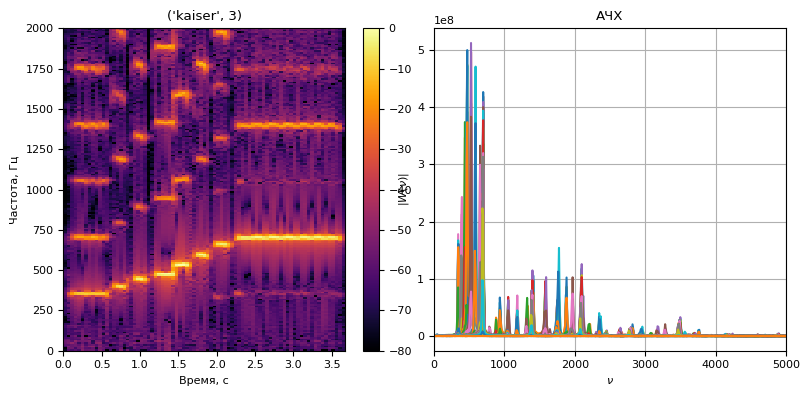

In [34]:
plot_stft(wav_data, samplerate, window=("kaiser", 3))

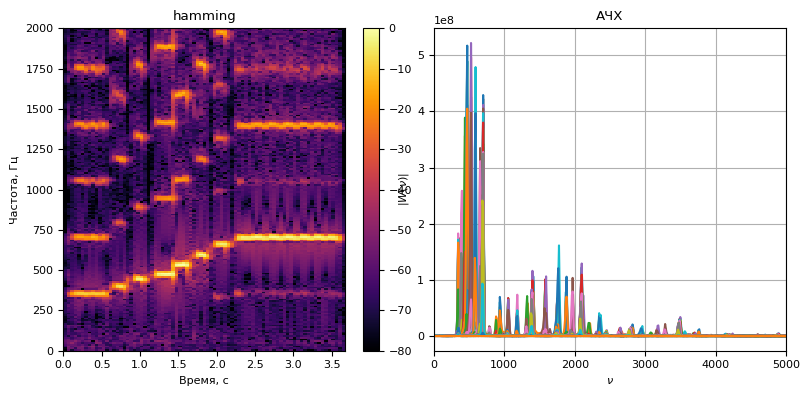

In [35]:
plot_stft(wav_data, samplerate, window="hamming")

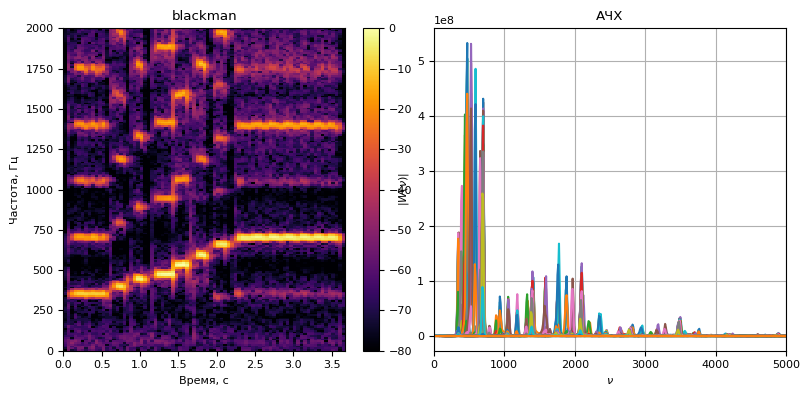

In [36]:
plot_stft(wav_data, samplerate, window="blackman")


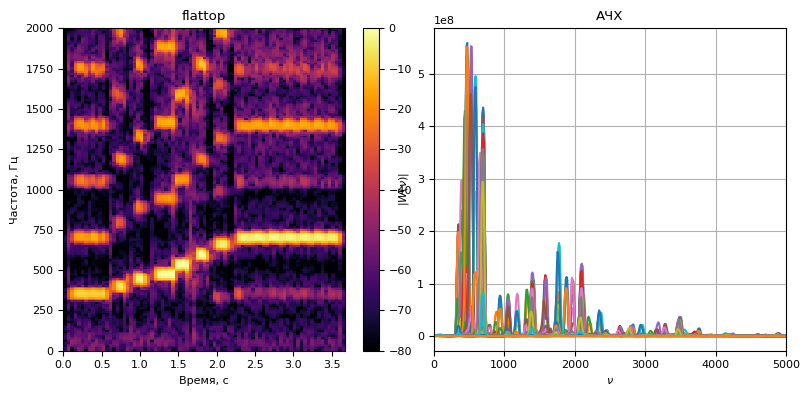

In [37]:
plot_stft(wav_data, samplerate, window="flattop")

## 3.2

In [38]:
f0 = 75
f1 = 870
T = 2
fs = 2000
M = 512


t = np.arange(0, T, 1 / fs)
x = scipy.signal.chirp(t, f0=f0, f1=f1, t1=T, method='linear')

In [39]:
from matplotlib import gridspec

def plot_chirp(window_name, nseg=5, nperseg=200, noverlap=0, m=M):
    plt.figure(figsize=[15, 12])

    gs = gridspec.GridSpec(nseg+1, 2, width_ratios=[8, 6])

    plt.subplot(gs[0])
    plt.plot(np.arange(x.size), x, '.-b')
    plt.xlim([0, x.size])
    plt.tight_layout()
    plt.grid()
    plt.ylabel('$x[k]$')
    plt.xlabel('$k$')

    plt.subplot(gs[1])
    X_n = np.fft.fft(x)
    plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0:X_n.size//2]), '.-b')
    plt.ylabel('$|X[n]|$')
    plt.xlabel('$f_n$, Гц')

    for u in range(nseg):
        plt.subplot(gs[u*2+2])
        y = x[(nperseg - noverlap)*u : (nperseg - noverlap)*u + nperseg] * scipy.signal.get_window(window_name, nperseg)
        plt.plot(np.arange((nperseg-noverlap)*u, (nperseg-noverlap)*u + nperseg), y, '.-C%i' %u)

        plt.xlim([0, x.size])
        plt.ylabel(f'$w[k]x[k+{u}H]$')
        plt.xlabel('$k$')
        plt.grid()
        plt.yticks([-1, 0, 1])
        plt.tight_layout()

        plt.subplot(gs[u*2+3])
        X_n=np.fft.fft(y, m)
        plt.plot(np.arange(X_n.size//2)*fs/X_n.size, abs(X_n[0 : X_n.size // 2]), '.-C%i'  %u)
        plt.ylabel(f'$|X_{u}[n]|$')
        plt.xlabel('$f_n,$ Гц')
        plt.tight_layout()



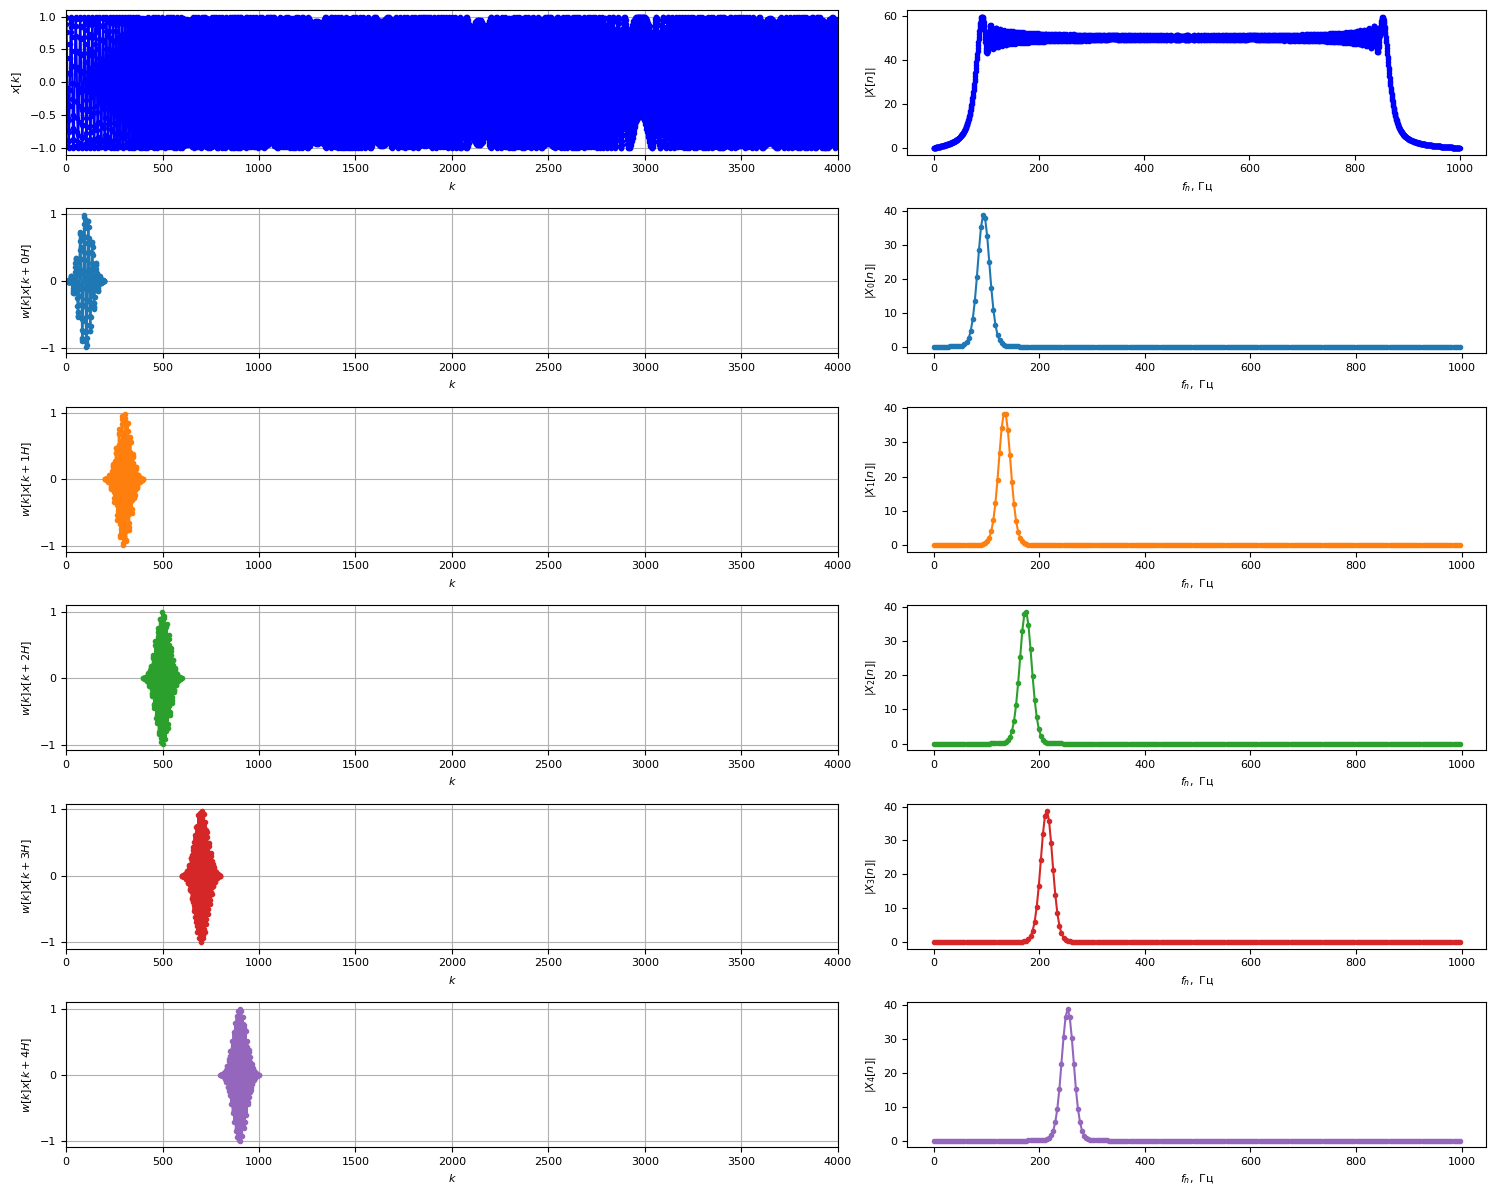

In [40]:
plot_chirp("blackman")

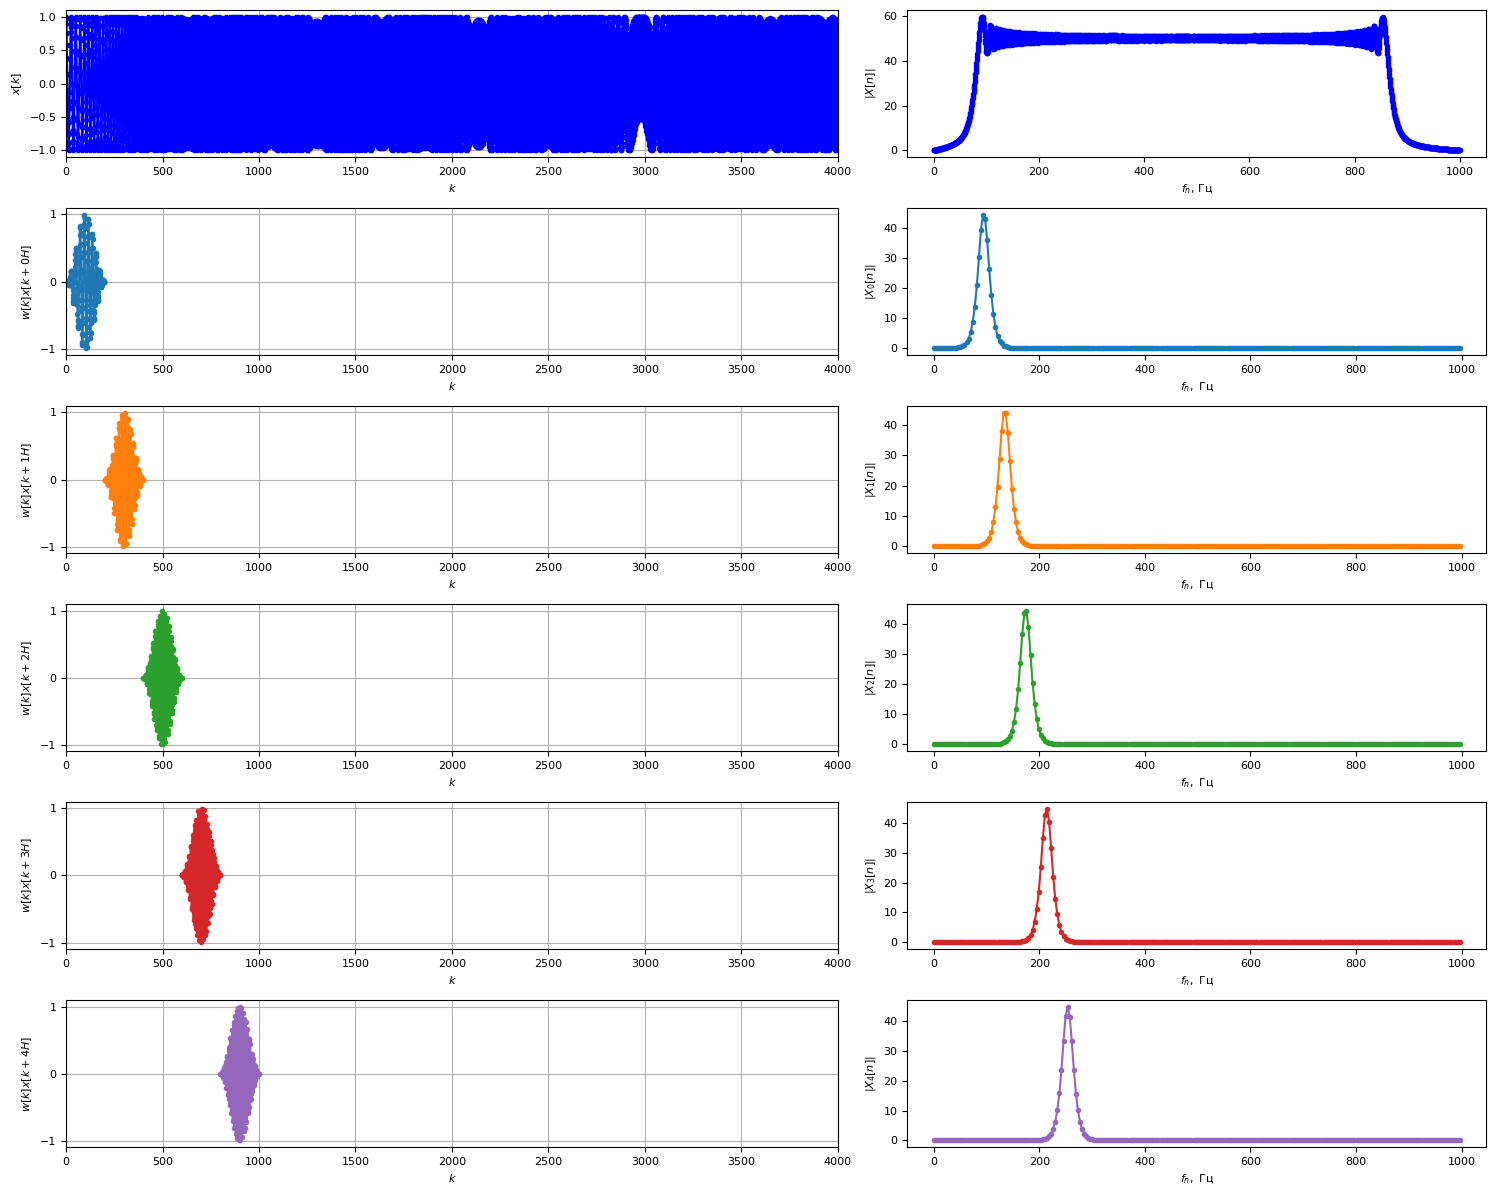

In [41]:
plot_chirp("hann")

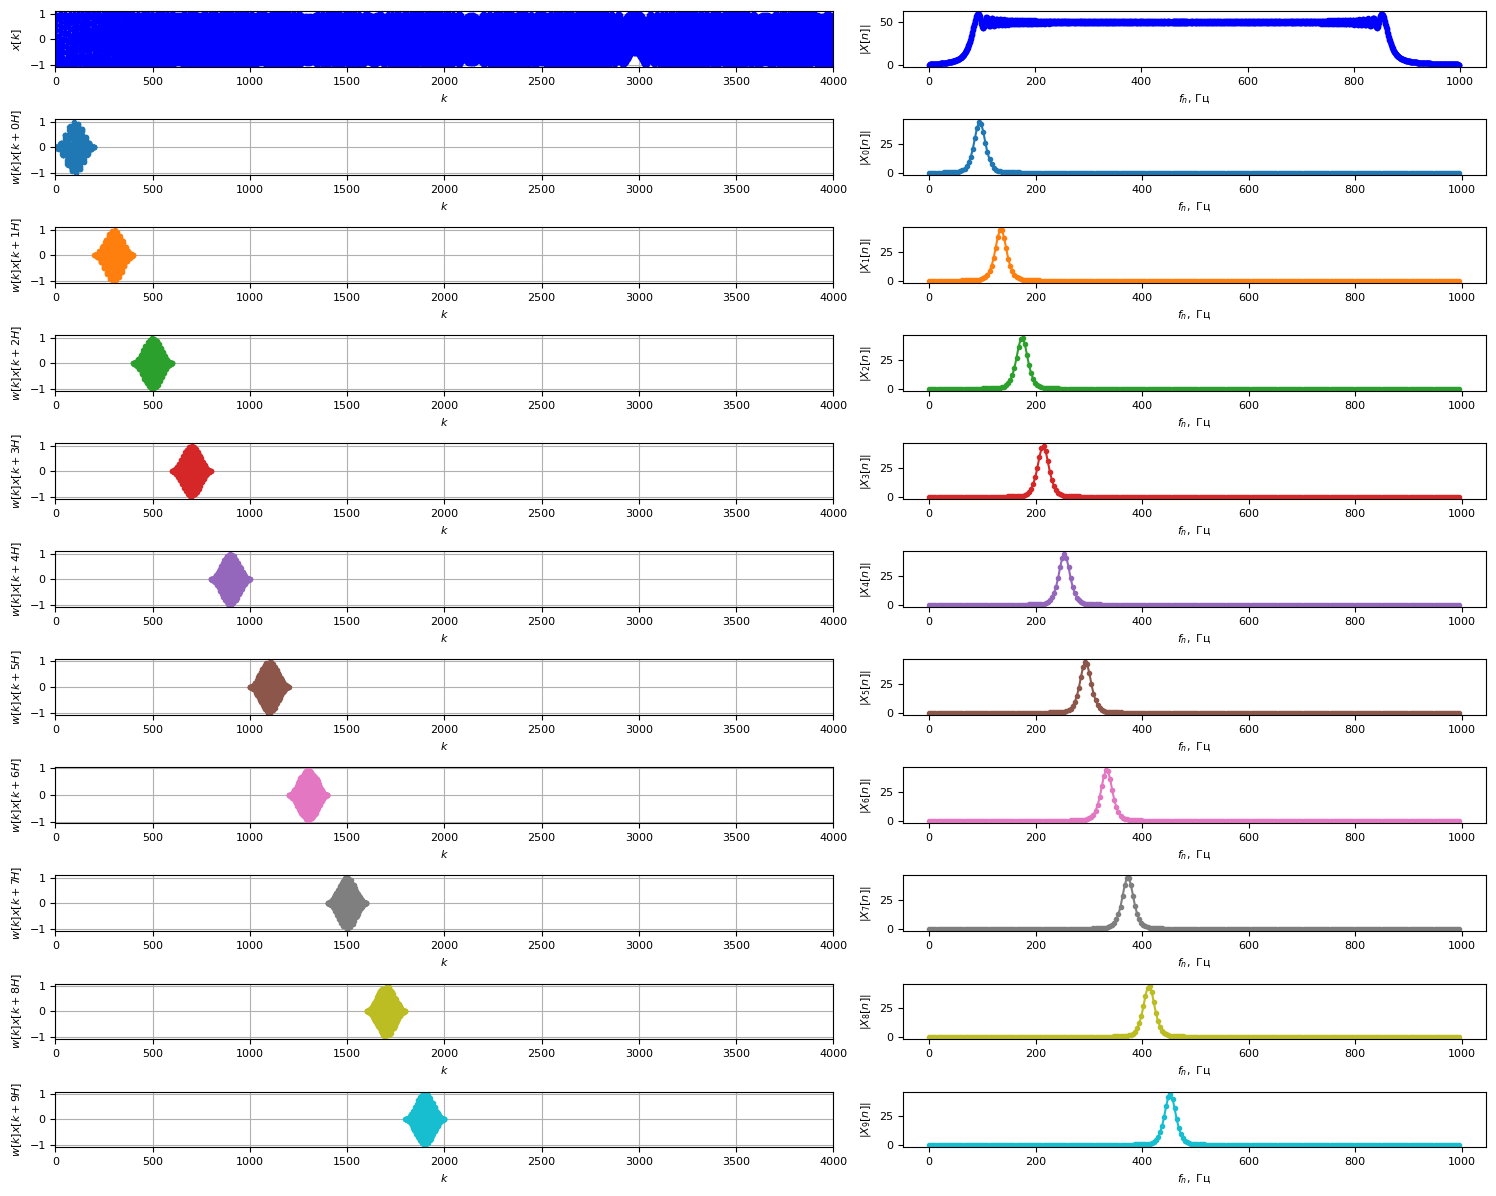

In [42]:
plot_chirp("hann", nseg=10)

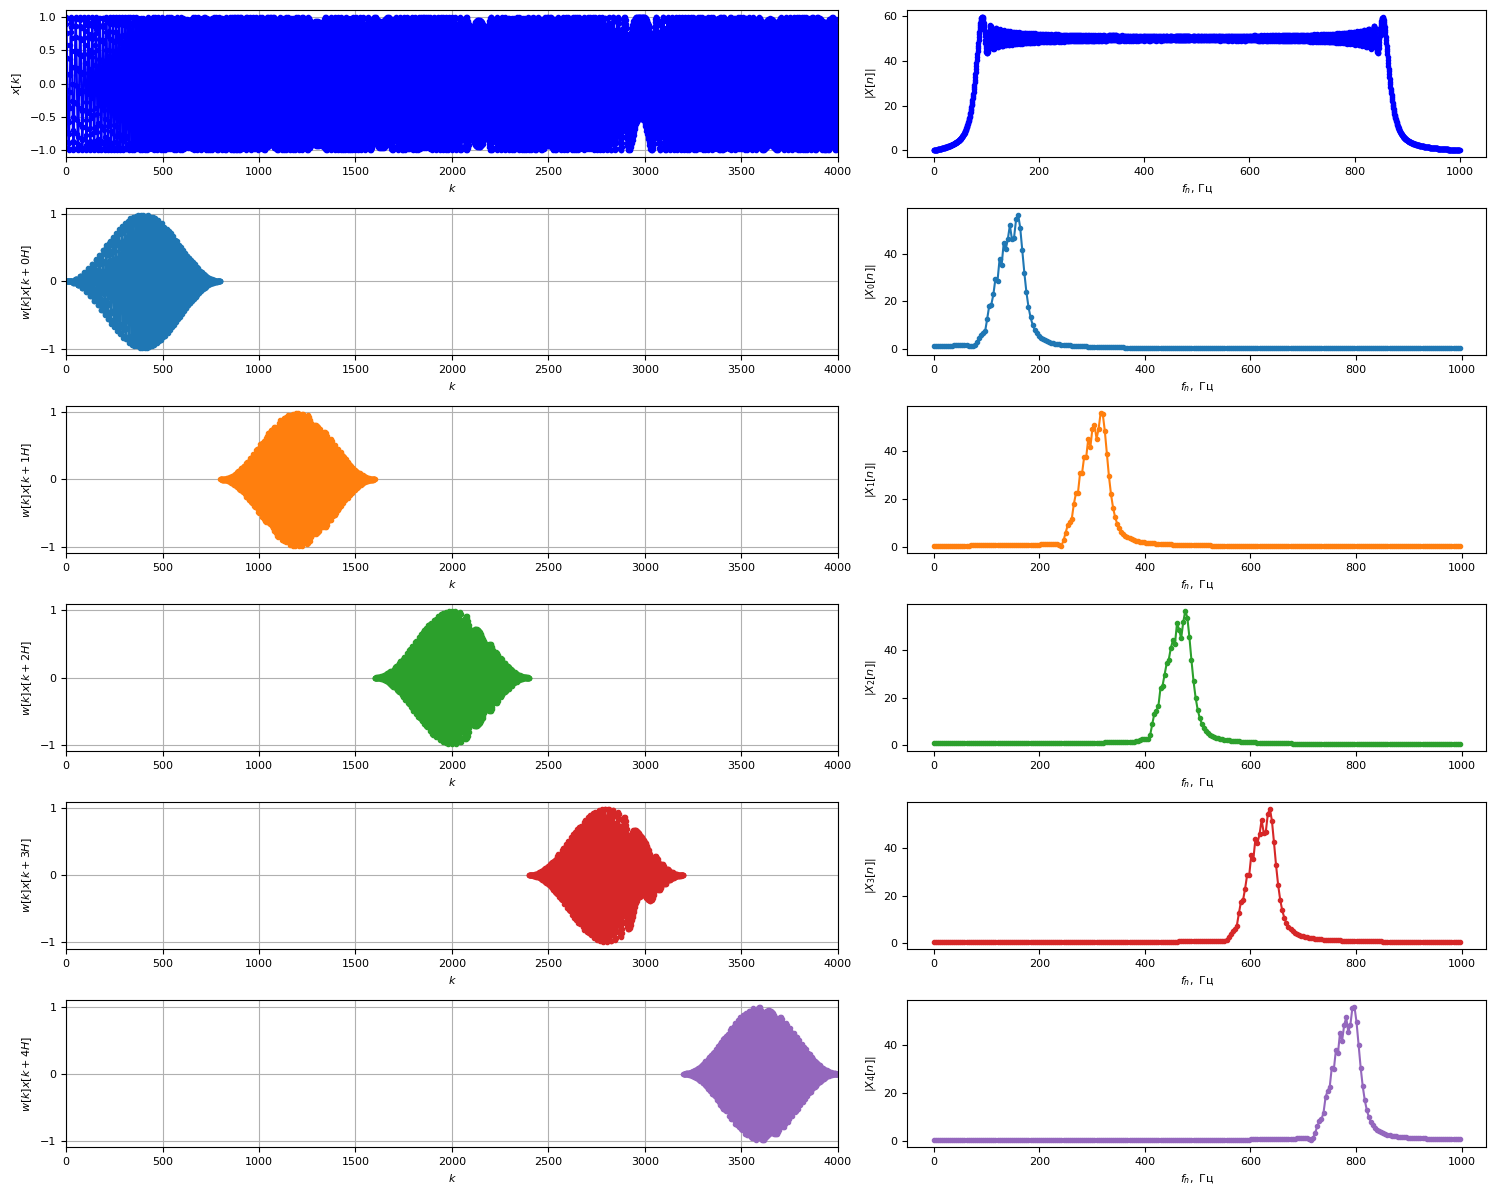

In [43]:
plot_chirp("hann", nperseg=800)


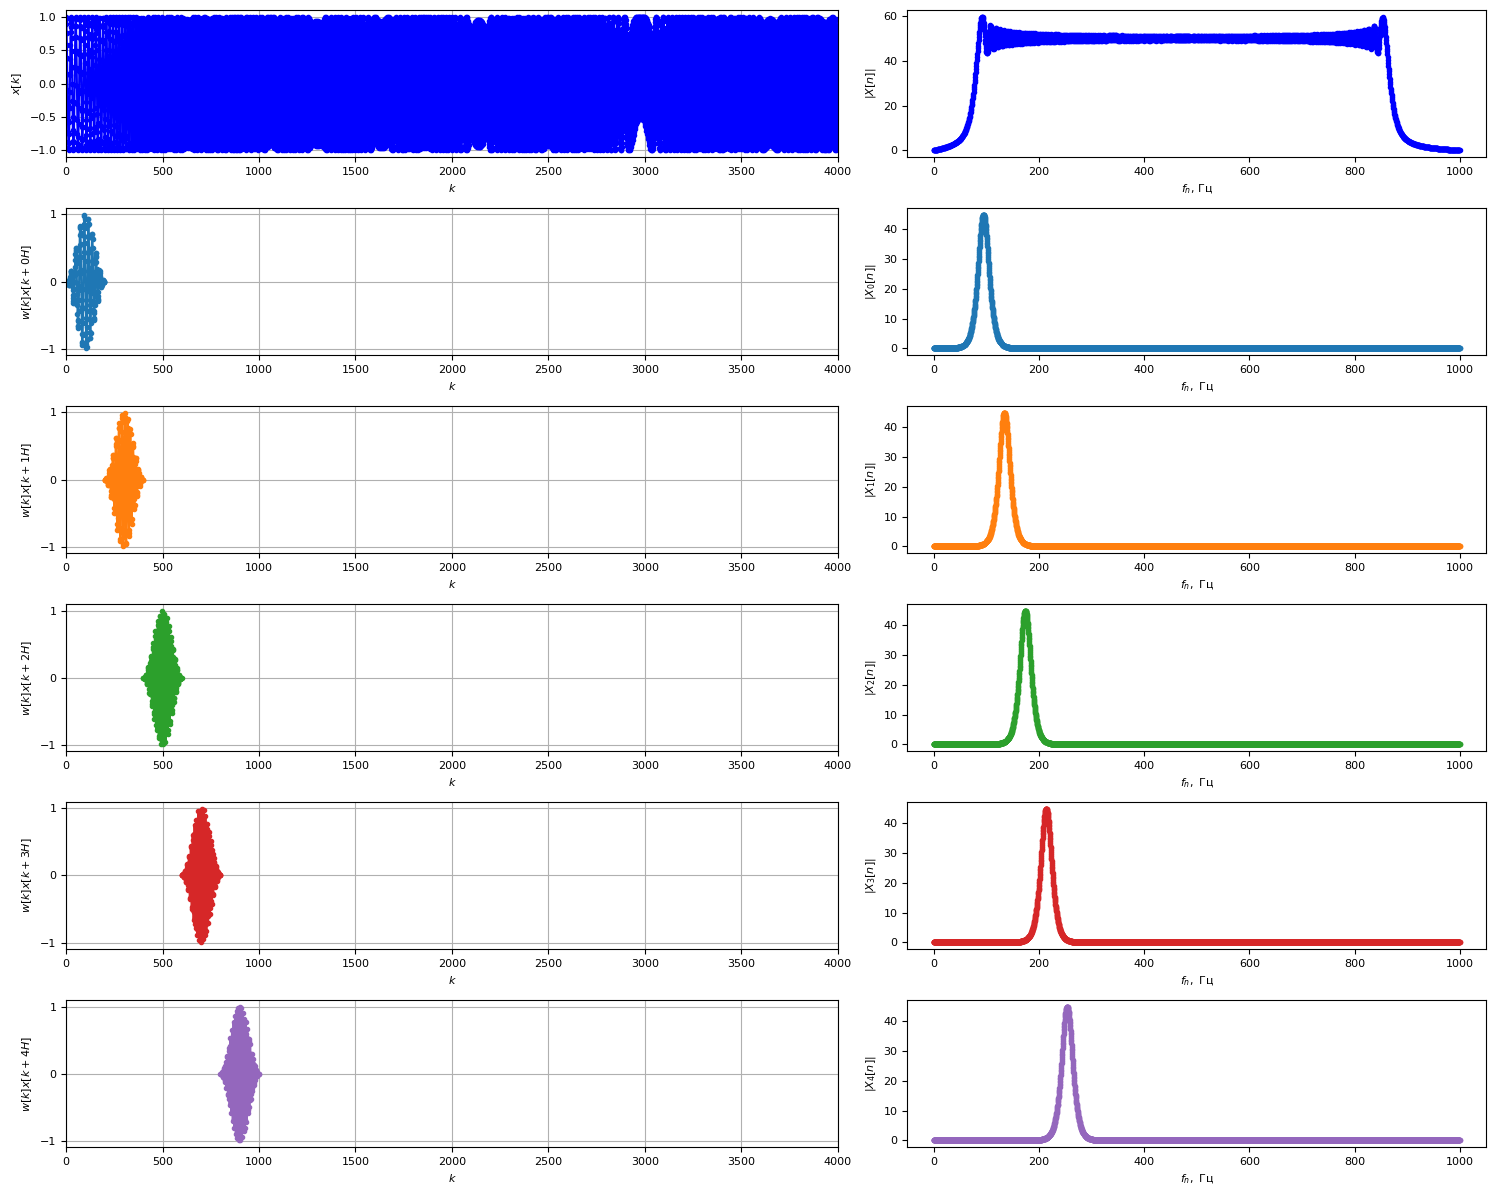

In [44]:
plot_chirp("hann", m=8192)
